# <center> Майнор "Интеллектуальный анализ данных" <center>

# <center> Курс "Современные методы машинного обучения" <center>

# <center> Лабораторная работа №1. Supervised learning <center>

## Table of contents  
  
* [Часть 1. Работа с данными](#part1)
* [Часть 2. Методы машинного обучения](#part2)
* [Часть 3. Соревнование по машинному обучению](#part3)

## Часть 1. Работа с данными <a id="part1"></a>

*Вес в общей оценке - 0.3*

В данной части лабораторной вам предстоит работать с данными по оттоку клиентов одной телекомуникационной компании.

Данные находятся в файле `train.csv`

При решении заданий старайтесь писать лаконичный и эффективный код; использовать методы `Pandas`.

**Описание данных:**

In [343]:
import pandas as pd

In [344]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_colwidth', None)

In [345]:
pd.read_csv('telecom_churn_description.csv')

,Признак,Описание,Тип
0,ID,Уникальный идентификатор объекта,Числовой (integer)
1,Sex,Пол,Символьный
2,Age,Возраст,Числовой (integer)
3,State,Буквенный код штата,Символьный
4,Account length,Как долго клиент обслуживается компанией,Числовой (integer)
5,Phone number,Номер телефона клиента,Символьный
6,Plans,Подключенные планы,Символьный (None; International/Voice mail or both)
7,Number vmail messages,Количество голосовых сообщений,Числовой (integer)
8,Total day minutes,Общая длительность разговоров днем,Числовой (float)
9,Total day calls,Общее количество звонков днем,Числовой (float)


### Задание 1  
  
Считайте данные из файла. Оцените размерность данных, есть ли в данных пропущенные значения. Посмотрите на автоматически определенные типы признаков.

In [346]:
import pandas as pd
import numpy as np

In [347]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [348]:
data = pd.read_csv('train.csv', sep=';')
data.head(10)

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn
0,10001,Female,35.0,MN,150,415 695 24 37,Voice mail,28,174.4,75.0,29.65,169.9,80.0,14.44,201.6,130.0,9.07,11.0,4.0,2.97,56.13,1,0
1,10010,Female,43.0,AR,87,408 673 99 45,None,0,185.8,119.0,31.59,192.3,83.0,16.35,200.0,96.0,9.00,6.6,4.0,1.78,58.72,1,0
2,10029,Female,39.0,ND,180,415 693 30 62,None,0,224.9,105.0,38.23,250.0,101.0,21.25,216.1,73.0,9.72,6.7,5.0,1.81,71.01,3,1
3,10030,Female,36.0,AL,200,408 248 27 61,None,0,128.2,87.0,21.79,133.2,105.0,11.32,177.6,123.0,7.99,11.2,2.0,3.02,44.12,1,0
4,10122,Male,37.0,DE,122,510 297 57 75,None,0,157.1,134.0,26.71,184.9,122.0,15.72,197.2,59.0,8.87,8.5,5.0,2.30,53.6,4,1
5,10224,Male,37.0,NE,44,415 246 36 36,None,0,240.3,146.0,40.85,164.6,83.0,13.99,240.7,106.0,10.83,10.6,2.0,2.86,68.53,1,0
6,10243,Male,33.0,GA,112,415 942 59 82,Voice mail,22,181.8,110.0,30.91,228.1,123.0,19.39,262.7,141.0,11.82,9.2,4.0,2.48,64.6,2,0
7,10264,Male,26.0,NC,26,415 590 46 78,None,0,234.5,109.0,39.87,216.5,129.0,18.40,191.6,94.0,8.62,3.5,6.0,0.95,67.84,3,0
8,10327,Female,33.0,DC,76,415 476 36 34,None,0,224.4,121.0,38.15,147.9,97.0,12.57,183.8,74.0,8.27,6.7,2.0,1.81,60.8,2,0
9,10449,Female,29.0,IA,81,510 907 61 26,None,0,261.4,141.0,44.44,215.7,102.0,18.33,271.8,96.0,12.23,8.0,6.0,2.16,77.16,1,1


In [349]:
data.shape

(2499, 23)

In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2499 non-null   int64  
 1   Sex                     2499 non-null   object 
 2   Age                     1757 non-null   float64
 3   State                   2499 non-null   object 
 4   Account length          2499 non-null   int64  
 5   Phone number            2499 non-null   object 
 6   Plans                   2428 non-null   object 
 7   Number vmail messages   2499 non-null   int64  
 8   Total day minutes       2499 non-null   object 
 9   Total day calls         2499 non-null   object 
 10  Total day charge        2499 non-null   float64
 11  Total eve minutes       2499 non-null   float64
 12  Total eve calls         2499 non-null   float64
 13  Total eve charge        2499 non-null   float64
 14  Total night minutes     2499 non-null   

Пропущенные данные есть в столбце 'Age', 'Plans'.

### Задание 2  
  
Приведите числовые признаки, которые были распознаны некорректно, к числовому типу данных.  
Найдите и опишите ошибки в данных, которые мешают приведению типов. Сколько признаков содержат ошибки, сколько наблюдений по каждому такому признаку? Исправьте эти ошибки и снова выполните приведение типов.  
**NB:** Исправлять ошибки необходимо программно (используя python), изменять исходный файл "руками" не разрешается. 

In [351]:
data['Phone number'].value_counts ()

415 988 85 24    1
415 240 14 30    1
415 101 88 10    1
510 174 76 58    1
415 710 94 83    1
                ..
415 461 54 13    1
408 144 98 76    1
510 920 37 48    1
510 118 15 63    1
510 599 88 53    1
Name: Phone number, Length: 2499, dtype: int64

In [352]:
data['Phone number'] = data['Phone number'].str.replace(' ', '')
data['Phone number']= data['Phone number'].astype('int64')

In [353]:
data.Plans.value_counts()

None                         1568
Voice mail                    618
International                 167
International, Voice mail      75
Name: Plans, dtype: int64

In [354]:
num_o = data['Total day minutes'].str.count('o').sum()
num_zapyatih = data['Total day minutes'].str.count(',').sum()
num_o, num_zapyatih

(6, 31)

In [355]:
print('Количество ошибок по признаку Plans: ', num_o + num_zapyatih)

Количество ошибок по признаку Plans:  37


In [356]:
data['Total day minutes'] = data['Total day minutes'].str.replace('o','0')
data['Total day minutes'] = data['Total day minutes'].str.replace(',','.')
data['Total day minutes'] = data['Total day minutes'].astype('float64')
data.head()

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn
0,10001,Female,35.0,MN,150,4156952437,Voice mail,28,174.4,75.0,29.65,169.9,80.0,14.44,201.6,130.0,9.07,11.0,4.0,2.97,56.13,1,0
1,10010,Female,43.0,AR,87,4086739945,None,0,185.8,119.0,31.59,192.3,83.0,16.35,200.0,96.0,9.00,6.6,4.0,1.78,58.72,1,0
2,10029,Female,39.0,ND,180,4156933062,None,0,224.9,105.0,38.23,250.0,101.0,21.25,216.1,73.0,9.72,6.7,5.0,1.81,71.01,3,1
3,10030,Female,36.0,AL,200,4082482761,None,0,128.2,87.0,21.79,133.2,105.0,11.32,177.6,123.0,7.99,11.2,2.0,3.02,44.12,1,0
4,10122,Male,37.0,DE,122,5102975775,None,0,157.1,134.0,26.71,184.9,122.0,15.72,197.2,59.0,8.87,8.5,5.0,2.30,53.6,4,1


In [357]:
num_o = data['Total day calls'].str.count('o').sum()
num_zapyatih = data['Total day calls'].str.count(',').sum()
num_o, num_zapyatih

(6, 0)

In [358]:
print('Количество ошибок по признаку Total day calls: ', num_o + num_zapyatih)

Количество ошибок по признаку Total day calls:  6


In [359]:
data['Total day calls'] = data['Total day calls'].str.replace('o','0')
data['Total day calls'] = data['Total day calls'].str.replace(',','.')
data['Total day calls'] = data['Total day calls'].astype('float64')
data.head()

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn
0,10001,Female,35.0,MN,150,4156952437,Voice mail,28,174.4,75.0,29.65,169.9,80.0,14.44,201.6,130.0,9.07,11.0,4.0,2.97,56.13,1,0
1,10010,Female,43.0,AR,87,4086739945,None,0,185.8,119.0,31.59,192.3,83.0,16.35,200.0,96.0,9.00,6.6,4.0,1.78,58.72,1,0
2,10029,Female,39.0,ND,180,4156933062,None,0,224.9,105.0,38.23,250.0,101.0,21.25,216.1,73.0,9.72,6.7,5.0,1.81,71.01,3,1
3,10030,Female,36.0,AL,200,4082482761,None,0,128.2,87.0,21.79,133.2,105.0,11.32,177.6,123.0,7.99,11.2,2.0,3.02,44.12,1,0
4,10122,Male,37.0,DE,122,5102975775,None,0,157.1,134.0,26.71,184.9,122.0,15.72,197.2,59.0,8.87,8.5,5.0,2.30,53.6,4,1


In [360]:
num_o = data['Total night minutes'].str.count('o').sum()
num_zapyatih = data['Total night minutes'].str.count(',').sum()
num_l = data['Total night minutes'].str.count('l').sum()
num_o, num_zapyatih, num_l

(0, 0, 9)

In [361]:
print('Количество ошибок по признаку Total night minutes: ', num_o + num_zapyatih + num_l)

Количество ошибок по признаку Total night minutes:  9


In [362]:
data['Total night minutes'] = data['Total night minutes'].str.replace('o','0')
data['Total night minutes'] = data['Total night minutes'].str.replace(',','.')
data['Total night minutes'] = data['Total night minutes'].str.replace('l','1')
data['Total night minutes'] = data['Total night minutes'].astype('float64')
data.head()

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn
0,10001,Female,35.0,MN,150,4156952437,Voice mail,28,174.4,75.0,29.65,169.9,80.0,14.44,201.6,130.0,9.07,11.0,4.0,2.97,56.13,1,0
1,10010,Female,43.0,AR,87,4086739945,None,0,185.8,119.0,31.59,192.3,83.0,16.35,200.0,96.0,9.00,6.6,4.0,1.78,58.72,1,0
2,10029,Female,39.0,ND,180,4156933062,None,0,224.9,105.0,38.23,250.0,101.0,21.25,216.1,73.0,9.72,6.7,5.0,1.81,71.01,3,1
3,10030,Female,36.0,AL,200,4082482761,None,0,128.2,87.0,21.79,133.2,105.0,11.32,177.6,123.0,7.99,11.2,2.0,3.02,44.12,1,0
4,10122,Male,37.0,DE,122,5102975775,None,0,157.1,134.0,26.71,184.9,122.0,15.72,197.2,59.0,8.87,8.5,5.0,2.30,53.6,4,1


In [363]:
num_o = data['Total intl minutes'].str.count('o').sum()
num_zapyatih = data['Total intl minutes'].str.count(',').sum()
num_l = data['Total intl minutes'].str.count('l').sum()
num_o, num_zapyatih, num_l

(0, 26, 0)

In [364]:
print('Количество ошибок по признаку Total intl minutes: ', num_o + num_zapyatih + num_l)

Количество ошибок по признаку Total intl minutes:  26


In [365]:
data['Total intl minutes'] = data['Total intl minutes'].str.replace(',','.')
data['Total intl minutes'] = data['Total intl minutes'].astype('float64')
data.head()

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn
0,10001,Female,35.0,MN,150,4156952437,Voice mail,28,174.4,75.0,29.65,169.9,80.0,14.44,201.6,130.0,9.07,11.0,4.0,2.97,56.13,1,0
1,10010,Female,43.0,AR,87,4086739945,None,0,185.8,119.0,31.59,192.3,83.0,16.35,200.0,96.0,9.00,6.6,4.0,1.78,58.72,1,0
2,10029,Female,39.0,ND,180,4156933062,None,0,224.9,105.0,38.23,250.0,101.0,21.25,216.1,73.0,9.72,6.7,5.0,1.81,71.01,3,1
3,10030,Female,36.0,AL,200,4082482761,None,0,128.2,87.0,21.79,133.2,105.0,11.32,177.6,123.0,7.99,11.2,2.0,3.02,44.12,1,0
4,10122,Male,37.0,DE,122,5102975775,None,0,157.1,134.0,26.71,184.9,122.0,15.72,197.2,59.0,8.87,8.5,5.0,2.30,53.6,4,1


In [366]:
num_o = data['Total charge'].str.count('o').sum()
num_zapyatih = data['Total charge'].str.count(',').sum()
num_hundr = data['Total charge'].str.count(' hundred').sum()
num_o, num_zapyatih, num_hundr

(0, 0, 11)

In [367]:
print('Количество ошибок по признаку Total charge: ', num_o + num_zapyatih + num_hundr)

Количество ошибок по признаку Total charge:  11


In [368]:
data['Total charge'] = data['Total charge'].apply(lambda x: float(x.replace(' hundred', '')) * 100)

In [369]:
num_o = data['Customer service calls'].str.count('o').sum()
num_zapyatih = data['Customer service calls'].str.count(',').sum()
num_o, num_zapyatih

(4, 0)

In [370]:
print('Количество ошибок по признаку Customer service calls: ', num_o + num_zapyatih)

Количество ошибок по признаку Customer service calls:  4


In [371]:
data['Customer service calls'] = data['Customer service calls'].str.replace('o','0')
data['Customer service calls'] = data['Customer service calls'].astype('int64')
data.head()

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn
0,10001,Female,35.0,MN,150,4156952437,Voice mail,28,174.4,75.0,29.65,169.9,80.0,14.44,201.6,130.0,9.07,11.0,4.0,2.97,5613.0,1,0
1,10010,Female,43.0,AR,87,4086739945,None,0,185.8,119.0,31.59,192.3,83.0,16.35,200.0,96.0,9.00,6.6,4.0,1.78,5872.0,1,0
2,10029,Female,39.0,ND,180,4156933062,None,0,224.9,105.0,38.23,250.0,101.0,21.25,216.1,73.0,9.72,6.7,5.0,1.81,7101.0,3,1
3,10030,Female,36.0,AL,200,4082482761,None,0,128.2,87.0,21.79,133.2,105.0,11.32,177.6,123.0,7.99,11.2,2.0,3.02,4412.0,1,0
4,10122,Male,37.0,DE,122,5102975775,None,0,157.1,134.0,26.71,184.9,122.0,15.72,197.2,59.0,8.87,8.5,5.0,2.30,5360.0,4,1


В итоге 6 признаков содержали опечатки.

### Задание 3  
  
Оцените набор данных на предмет пропущенных значений. Какие признаки содержат пропуски? Сколько наблюдений с пропусками по каждому такому признаку?  
По каждому признаку предложите и обоснуйте, что делать с пропущенными значениями. 

In [372]:
A = data.isnull()
A.head()
print('Missing values by features:', A.sum(), sep='\n')

Missing values by features:
ID                          0
Sex                         0
Age                       742
State                       0
Account length              0
Phone number                0
Plans                      71
Number vmail messages       0
Total day minutes           0
Total day calls             0
Total day charge            0
Total eve minutes           0
Total eve calls             0
Total eve charge            0
Total night minutes         0
Total night calls           0
Total night charge          0
Total intl minutes          0
Total intl calls            0
Total intl charge           0
Total charge                0
Customer service calls      0
Churn                       0
dtype: int64


Пропущенные данные есть в признаках 'Age', 'Plans' 742 и 71 соответственно.

Признаки 'Age', 'Plans' содержат пропуски. По  'Age' 742 пропущенных наблюдений, по 'Plans' 71 пропущенных наблюдений. Логично пустые значения в 'Age' заполнить средним значением по столбцу, 'Plans' оставить 'None'.

In [373]:
data['Age'].fillna(round(data['Age'].mean(), 0), inplace=True)

In [374]:
data['Plans'].fillna('None', inplace=True)

In [375]:
data_main = data.copy(deep = True)
data_main.head(10)

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn
0,10001,Female,35.0,MN,150,4156952437,Voice mail,28,174.4,75.0,29.65,169.9,80.0,14.44,201.6,130.0,9.07,11.0,4.0,2.97,5613.0,1,0
1,10010,Female,43.0,AR,87,4086739945,None,0,185.8,119.0,31.59,192.3,83.0,16.35,200.0,96.0,9.00,6.6,4.0,1.78,5872.0,1,0
2,10029,Female,39.0,ND,180,4156933062,None,0,224.9,105.0,38.23,250.0,101.0,21.25,216.1,73.0,9.72,6.7,5.0,1.81,7101.0,3,1
3,10030,Female,36.0,AL,200,4082482761,None,0,128.2,87.0,21.79,133.2,105.0,11.32,177.6,123.0,7.99,11.2,2.0,3.02,4412.0,1,0
4,10122,Male,37.0,DE,122,5102975775,None,0,157.1,134.0,26.71,184.9,122.0,15.72,197.2,59.0,8.87,8.5,5.0,2.30,5360.0,4,1
5,10224,Male,37.0,NE,44,4152463636,None,0,240.3,146.0,40.85,164.6,83.0,13.99,240.7,106.0,10.83,10.6,2.0,2.86,6853.0,1,0
6,10243,Male,33.0,GA,112,4159425982,Voice mail,22,181.8,110.0,30.91,228.1,123.0,19.39,262.7,141.0,11.82,9.2,4.0,2.48,6460.0,2,0
7,10264,Male,26.0,NC,26,4155904678,None,0,234.5,109.0,39.87,216.5,129.0,18.40,191.6,94.0,8.62,3.5,6.0,0.95,6784.0,3,0
8,10327,Female,33.0,DC,76,4154763634,None,0,224.4,121.0,38.15,147.9,97.0,12.57,183.8,74.0,8.27,6.7,2.0,1.81,6080.0,2,0
9,10449,Female,29.0,IA,81,5109076126,None,0,261.4,141.0,44.44,215.7,102.0,18.33,271.8,96.0,12.23,8.0,6.0,2.16,7716.0,1,1


### Задание 4  
  
В признаке `Phone number` первые три цифры номера отвечают за код зоны покрытия сети.  
Создайте новый признак `Area code`, содержайщий код покрытия сети.  
Вычислите, сколько таких зон представлено в данных. Сколько наблюдений по каждой зоне?  
Вычислите, сколько штатов входит в каждую зону. Есть ли штаты, которые находятся сразу в нескольких зонах покрытия? Если есть, приведите примеры.

In [376]:
t = data['Phone number'].values.tolist()
a = []
for i in range(len(t)):
    a.append(str(t[i])[:3])
data['Area code'] = a
data

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn,Area code
0,10001,Female,35.0,MN,150,4156952437,Voice mail,28,174.4,75.0,29.65,169.9,80.0,14.44,201.6,130.0,9.07,11.0,4.0,2.97,5613.0,1,0,415
1,10010,Female,43.0,AR,87,4086739945,None,0,185.8,119.0,31.59,192.3,83.0,16.35,200.0,96.0,9.00,6.6,4.0,1.78,5872.0,1,0,408
2,10029,Female,39.0,ND,180,4156933062,None,0,224.9,105.0,38.23,250.0,101.0,21.25,216.1,73.0,9.72,6.7,5.0,1.81,7101.0,3,1,415
3,10030,Female,36.0,AL,200,4082482761,None,0,128.2,87.0,21.79,133.2,105.0,11.32,177.6,123.0,7.99,11.2,2.0,3.02,4412.0,1,0,408
4,10122,Male,37.0,DE,122,5102975775,None,0,157.1,134.0,26.71,184.9,122.0,15.72,197.2,59.0,8.87,8.5,5.0,2.30,5360.0,4,1,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,99929,Male,31.0,PA,101,4154306478,International,0,193.7,108.0,32.93,186.6,98.0,15.86,223.0,100.0,10.04,11.6,8.0,3.13,6196.0,0,0,415
2495,99933,Male,37.0,MI,37,4158211586,None,0,191.4,116.0,32.54,167.4,99.0,14.23,216.5,112.0,9.74,14.0,5.0,3.78,6029.0,3,0,415
2496,99943,Male,32.0,MN,13,5101919769,Voice mail,21,315.6,105.0,53.65,208.9,71.0,17.76,260.1,123.0,11.70,12.1,3.0,3.27,8638.0,3,0,510
2497,99949,Male,35.0,WY,43,4158466088,International,0,251.5,105.0,42.76,212.8,104.0,18.09,157.8,67.0,7.10,9.3,4.0,2.51,7046.0,0,0,415


In [377]:
data['Area code'].value_counts()

415    1247
408     632
510     620
Name: Area code, dtype: int64

In [378]:
data[data['Area code'] == '415']['State'].nunique()

51

In [379]:
data[data['Area code'] == '408']['State'].nunique()

51

In [380]:
data[data['Area code'] == '510']['State'].nunique()

51

Каждая зона покрытия присутствует в каждом штате. Есть штаты с несколькими зонами покрытий. Например наблюдения 0, 2496 имеют одинаковый штат MN, но разные зоны покрытия 510, 415

### Задание 5  
  
Вычислите тарифные планы (стоимость минуты разговора): day, eve, night, intl.  
Проверьте, различаются ли они для различных зон покрытия сети. 

In [381]:
data['traffic_day'] = data['Total day charge']/data['Total day minutes']
data['traffic_eve'] = data['Total eve charge']/data['Total eve minutes']
data['traffic_night'] = data['Total night charge']/data['Total night minutes']
data['traffic_intl'] = data['Total intl charge']/data['Total intl minutes']

In [382]:
data.head()

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn,Area code,traffic_day,traffic_eve,traffic_night,traffic_intl
0,10001,Female,35.0,MN,150,4156952437,Voice mail,28,174.4,75.0,29.65,169.9,80.0,14.44,201.6,130.0,9.07,11.0,4.0,2.97,5613.0,1,0,415,0.170011,0.084991,0.044990,0.270000
1,10010,Female,43.0,AR,87,4086739945,None,0,185.8,119.0,31.59,192.3,83.0,16.35,200.0,96.0,9.00,6.6,4.0,1.78,5872.0,1,0,408,0.170022,0.085023,0.045000,0.269697
2,10029,Female,39.0,ND,180,4156933062,None,0,224.9,105.0,38.23,250.0,101.0,21.25,216.1,73.0,9.72,6.7,5.0,1.81,7101.0,3,1,415,0.169987,0.085000,0.044979,0.270149
3,10030,Female,36.0,AL,200,4082482761,None,0,128.2,87.0,21.79,133.2,105.0,11.32,177.6,123.0,7.99,11.2,2.0,3.02,4412.0,1,0,408,0.169969,0.084985,0.044989,0.269643
4,10122,Male,37.0,DE,122,5102975775,None,0,157.1,134.0,26.71,184.9,122.0,15.72,197.2,59.0,8.87,8.5,5.0,2.30,5360.0,4,1,510,0.170019,0.085019,0.044980,0.270588


Для наглядности возьмем среднее значение для разных покрытий зон. Получим следующие значения:

Трафик днём:

In [383]:
data[data['Area code'] == '408']['traffic_day'].mean()

0.17000277325930743

In [384]:
data[data['Area code'] == '415']['traffic_day'].mean()

0.17000305774676444

In [385]:
data[data['Area code'] == '510']['traffic_day'].mean()

0.17000280860279138

Трафик вечером:

In [386]:
data[data['Area code'] == '408']['traffic_eve'].mean()

0.0850005387868913

In [387]:
data[data['Area code'] == '415']['traffic_eve'].mean()

0.08500071787899348

In [388]:
data[data['Area code'] == '510']['traffic_eve'].mean()

0.08500200285949051

Трафик ночью:

In [389]:
data[data['Area code'] == '408']['traffic_night'].mean()

0.04500087228235344

In [390]:
data[data['Area code'] == '415']['traffic_night'].mean()

0.0449998267674485

In [391]:
data[data['Area code'] == '510']['traffic_night'].mean()

0.04499996432535917

Трафик международный:

In [392]:
data[data['Area code'] == '408']['traffic_intl'].mean()

0.2700673812575699

In [393]:
data[data['Area code'] == '415']['traffic_intl'].mean()

0.27006107593709827

In [394]:
data[data['Area code'] == '510']['traffic_intl'].mean()

0.2700485234732247

Как видно, трафики не сильно различаются в разных зонах покрытия (отличие идет на пятой цифре после запятой, что для нас не существенно).

### Задание 6  
  
По каждому штату и каждому плану в признаке `Plans` (International и Voice mail) вычислите количество клиентов, подключивших этот план и их долю **внутри штата**. Пример вывода:
  
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>State</th>
      <th>Plan</th>
      <th>Count</th>
      <th>Frac</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>state_1</td>
      <td>International</td>
      <td>40</td>
      <td>0.4</td>
    </tr>
    <tr>
      <th>1</th>
      <td>state_1</td>
      <td>Voice mail</td>
      <td>30</td>
      <td>0.3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>state_2</td>
      <td>International</td>
      <td>25</td>
      <td>0.5</td>
    </tr>
    <tr>
      <th>3</th>
      <td>state_2</td>
      <td>Voice mail</td>
      <td>35</td>
      <td>0.7</td>
    </tr>
  </tbody>
</table>

In [395]:
data_1 = pd.DataFrame(data['State'].unique(), columns = ['State'])
data_1 = data_1.append(data_1)
data_1 = data_1.sort_index(ascending = True)
data_1 = data_1.reset_index(drop = True)
data_1

,State
0,MN
1,MN
2,AR
3,AR
4,ND
...,...
97,MO
98,TX
99,TX
100,CT


In [396]:
data['Plans'].value_counts()

None                         1639
Voice mail                    618
International                 167
International, Voice mail      75
Name: Plans, dtype: int64

In [397]:
t = []
for i in range(51):
    t.append('International')
    t.append('Voice mail')
data_1['Plan'] = t
data_1

,State,Plan
0,MN,International
1,MN,Voice mail
2,AR,International
3,AR,Voice mail
4,ND,International
...,...,...
97,MO,Voice mail
98,TX,International
99,TX,Voice mail
100,CT,International


In [398]:
b = []
c = []
for i in data['State'].unique():
    b.append(data[(data['State'] == i) & ((data['Plans'] == 'International') | (data['Plans'] == 'International, Voice mail'))]['ID'].count())
    c.append(data[(data['State'] == i) & ((data['Plans'] == 'Voice mail') | (data['Plans'] == 'International, Voice mail'))]['ID'].count())

In [399]:
t = []
for i in range(51):
    t.append(b[i])
    t.append(c[i])
data_1['Count'] = t
data_1

,State,Plan,Count
0,MN,International,3
1,MN,Voice mail,21
2,AR,International,7
3,AR,Voice mail,11
4,ND,International,7
...,...,...,...
97,MO,Voice mail,14
98,TX,International,4
99,TX,Voice mail,12
100,CT,International,5


In [400]:
u = []
for i in data['State'].unique():
    u.append(data[(data['State'] == i)]['ID'].count())
    u.append(data[(data['State'] == i)]['ID'].count())
frac = []
for i in range(len(u)):
    frac.append(t[i]/u[i])
data_1['Frac'] = frac

In [401]:
data_1

,State,Plan,Count,Frac
0,MN,International,3,0.044776
1,MN,Voice mail,21,0.313433
2,AR,International,7,0.152174
3,AR,Voice mail,11,0.239130
4,ND,International,7,0.148936
...,...,...,...,...
97,MO,Voice mail,14,0.280000
98,TX,International,4,0.076923
99,TX,Voice mail,12,0.230769
100,CT,International,5,0.098039


### Задание 7  
  
Для нечисловых признаков выполните преобразование к числовому виду. Обоснуйте выбранное преобразование для каждого признака. 

In [402]:
#Удалим столбцы, полученные в 5м задании
data.drop(['traffic_day', 'traffic_eve', 'traffic_night', 'traffic_intl'], axis=1, inplace=True)

In [403]:
from sklearn.preprocessing import OneHotEncoder


data['Area code'] = data['Area code'].astype('int64')

one = OneHotEncoder(sparse=False)

transformed = one.fit_transform(data.Sex.values.reshape(-1, 1))
one_df = pd.DataFrame(transformed, columns=one.get_feature_names())
data = pd.concat([data, one_df], axis=1).drop(['Sex'], axis=1)

transformed = one.fit_transform(data.Plans.values.reshape(-1, 1))
one_df = pd.DataFrame(transformed, columns=one.get_feature_names())
data = pd.concat([data, one_df], axis=1).drop(['Plans'], axis=1)


codes, uniques = pd.factorize(data['State'])
print(codes)
print(uniques)

[ 0  1  2 ...  0 23 12]
Index(['MN', 'AR', 'ND', 'AL', 'DE', 'NE', 'GA', 'NC', 'DC', 'IA', 'MS', 'NH',
       'NY', 'AZ', 'UT', 'IN', 'WI', 'OK', 'WV', 'OR', 'ID', 'FL', 'NV', 'WY',
       'MI', 'KS', 'KY', 'VA', 'MT', 'PA', 'NM', 'IL', 'NJ', 'CO', 'LA', 'CA',
       'MD', 'SD', 'OH', 'ME', 'SC', 'TN', 'WA', 'AK', 'MA', 'RI', 'HI', 'VT',
       'MO', 'TX', 'CT'],
      dtype='object')


In [404]:
code = []
for i in range(len(uniques)):
    code.append(codes[data.loc[data['State'] == uniques[i]].index[0]])

In [405]:
data['State'] = codes
data['State'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [406]:
print(code) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [407]:
data.head()

,ID,Age,State,Account length,Phone number,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn,Area code,x0_Female,x0_Male,x0_International,"x0_International, Voice mail",x0_None,x0_Voice mail
0,10001,35.0,0,150,4156952437,28,174.4,75.0,29.65,169.9,80.0,14.44,201.6,130.0,9.07,11.0,4.0,2.97,5613.0,1,0,415,1.0,0.0,0.0,0.0,0.0,1.0
1,10010,43.0,1,87,4086739945,0,185.8,119.0,31.59,192.3,83.0,16.35,200.0,96.0,9.00,6.6,4.0,1.78,5872.0,1,0,408,1.0,0.0,0.0,0.0,1.0,0.0
2,10029,39.0,2,180,4156933062,0,224.9,105.0,38.23,250.0,101.0,21.25,216.1,73.0,9.72,6.7,5.0,1.81,7101.0,3,1,415,1.0,0.0,0.0,0.0,1.0,0.0
3,10030,36.0,3,200,4082482761,0,128.2,87.0,21.79,133.2,105.0,11.32,177.6,123.0,7.99,11.2,2.0,3.02,4412.0,1,0,408,1.0,0.0,0.0,0.0,1.0,0.0
4,10122,37.0,4,122,5102975775,0,157.1,134.0,26.71,184.9,122.0,15.72,197.2,59.0,8.87,8.5,5.0,2.30,5360.0,4,1,510,0.0,1.0,0.0,0.0,1.0,0.0


### Задание 8  
  
Сколько линейно-зависимых признаков присутствует в данных?  
Определите и удалите признаки, которые линейно зависят от остальных.

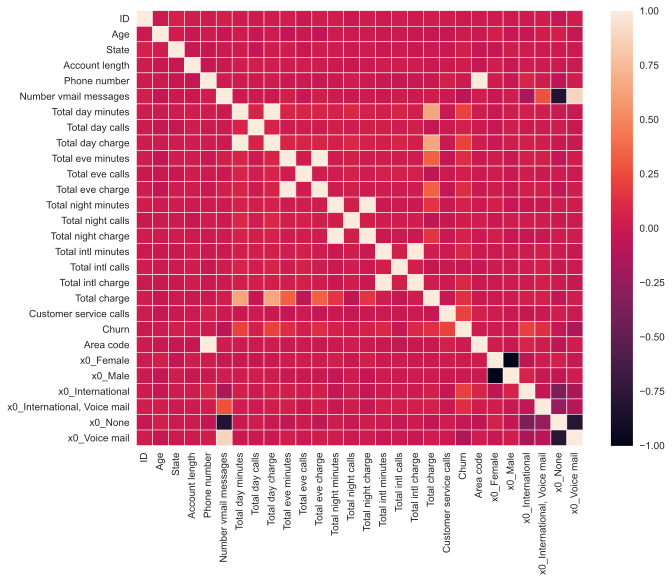

In [408]:
import numpy as np
import pandas as pd

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# стиль seaborn
# style.available выводит все доступные стили
from matplotlib import style
style.use('seaborn')

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')



plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, fmt=".2f", linewidths=.5)

Заметно, что признаки: Plans и Number vmail messages, Phone number и Area code, Plans и Number vmail messages, Total day minutes и Total day charge, Total eve minutes и Total eve charge, Total night minutes и Total night charge, Total intl minutes и Total intl charge

In [409]:
corr_mat = data[['Total day charge', 
                 'Total eve charge', 
                 'Total night charge', 
                 'Total intl charge',
                 'Total charge'
                ]].corr()

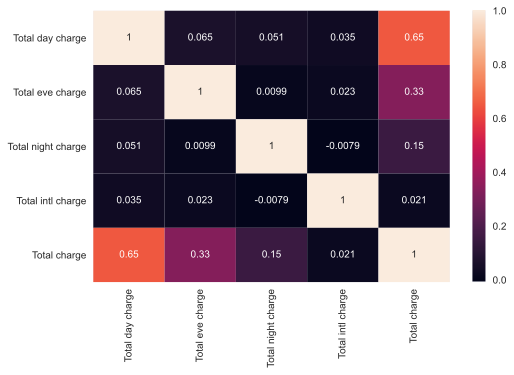

In [410]:
sns.heatmap(corr_mat, annot=True)
plt.ylim((corr_mat.shape[0], 0)) # fixes bug in matplotlib 3.1.1, should be removed in other versions
plt.show()

In [411]:
data.drop(['ID', 'Area code', 'Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'], axis=1, inplace=True)
data.head()

,Age,State,Account length,Phone number,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Total charge,Customer service calls,Churn,x0_Female,x0_Male,x0_International,"x0_International, Voice mail",x0_None,x0_Voice mail
0,35.0,0,150,4156952437,174.4,75.0,169.9,80.0,201.6,130.0,11.0,4.0,5613.0,1,0,1.0,0.0,0.0,0.0,0.0,1.0
1,43.0,1,87,4086739945,185.8,119.0,192.3,83.0,200.0,96.0,6.6,4.0,5872.0,1,0,1.0,0.0,0.0,0.0,1.0,0.0
2,39.0,2,180,4156933062,224.9,105.0,250.0,101.0,216.1,73.0,6.7,5.0,7101.0,3,1,1.0,0.0,0.0,0.0,1.0,0.0
3,36.0,3,200,4082482761,128.2,87.0,133.2,105.0,177.6,123.0,11.2,2.0,4412.0,1,0,1.0,0.0,0.0,0.0,1.0,0.0
4,37.0,4,122,5102975775,157.1,134.0,184.9,122.0,197.2,59.0,8.5,5.0,5360.0,4,1,0.0,1.0,0.0,0.0,1.0,0.0


Для удобства создадим новый признак пола.

In [412]:
data.drop(['x0_Female'], axis=1, inplace=True)
data['Male'] = data['x0_Male']
data.drop(['x0_Male'], axis=1, inplace=True)

### Задание 9  
  
Проведите анализ зависимости признаков.  
Для числовых признаков вычислите корреляции друг с другом и с целевой переменной `Churn`. Постройте heatmap.  
Для категориальных признаков оцените их связь с целевой переменной, постройте графики.  
  
Сделайте выводы по результатм анализа. Можно ли избавиться от некоторых признаков? Если да, то от каких и почему?

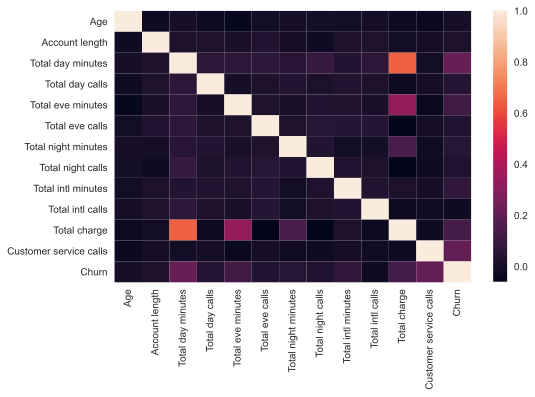

In [413]:
corr_mat = data[['Age', 'Account length', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls',
'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls',
'Total charge', 'Customer service calls', 'Churn']].corr()

sns.heatmap(corr_mat, annot=False)
plt.ylim((corr_mat.shape[0], 0)) # fixes bug in matplotlib 3.1.1, should be removed in other versions
plt.show()

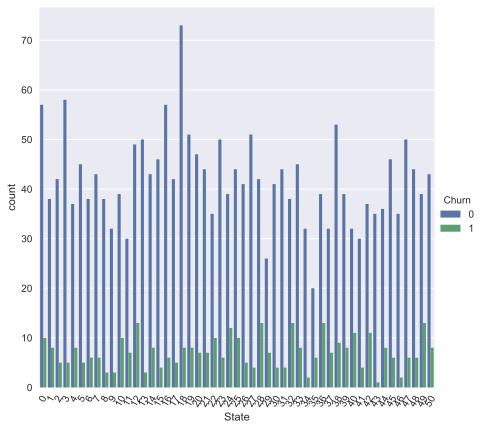

In [414]:
sns.factorplot(x='State', hue='Churn', data=data, kind='count', size = 6).set_xticklabels(rotation=60)

Видно, что уход клиента на имеет сильной зависимости от штата.

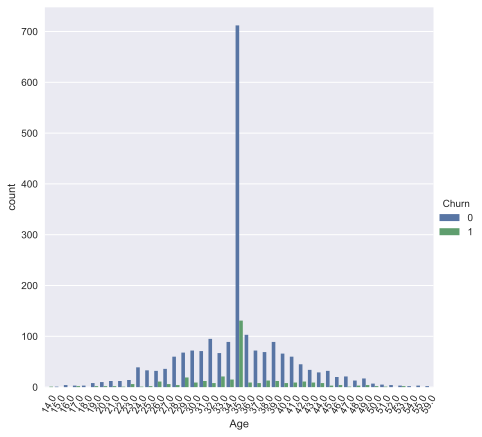

In [415]:
sns.factorplot(x='Age', hue='Churn', data=data, kind='count', size = 6).set_xticklabels(rotation=60)

Видно, что уход клиента на имеет сильной зависимости от возраста.

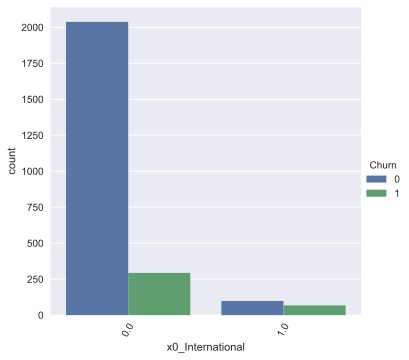

In [416]:
sns.factorplot(x='x0_International', hue='Churn', data=data, kind='count', size = 5).set_xticklabels(rotation=60)

Видно, что при подключении плана 'International' почти 50% клиентов уходит.

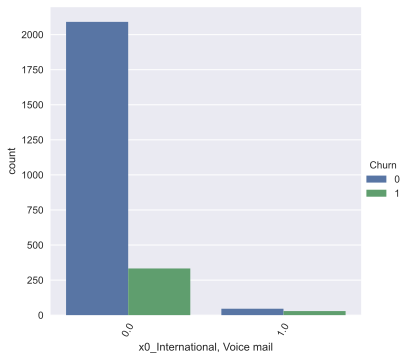

In [417]:
sns.factorplot(x='x0_International, Voice mail', hue='Churn', data=data, kind='count', size = 5).set_xticklabels(rotation=60)

Видно, что при подключении плана 'International'и 'Voice mail' почти 50% клиентов уходит.

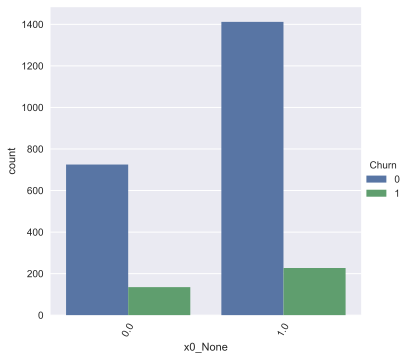

In [418]:
sns.factorplot(x='x0_None', hue='Churn', data=data, kind='count', size = 5).set_xticklabels(rotation=60)

Влияния на уход клиента отсутствие плана не обнаружено.

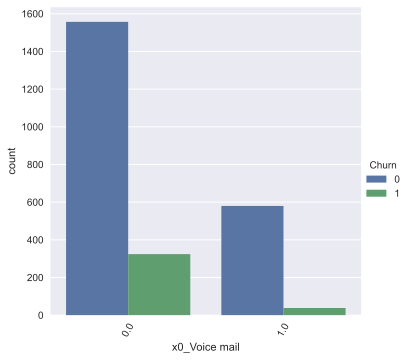

In [419]:
sns.factorplot(x='x0_Voice mail', hue='Churn', data=data, kind='count', size = 5).set_xticklabels(rotation=60)

Влияния на уход клиента плана 'Voice mail' не обнаружено.

Можно заключить, что если подключен план International (даже в паре с Voice mail), почти в 50% случаев клиент уходит. Если тарифы не подключены, то #лишь 14% клиентов уходит.

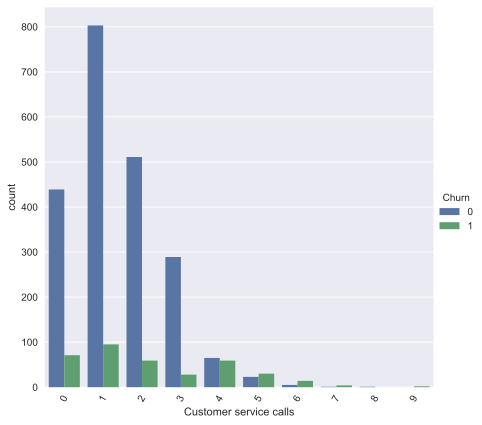

In [420]:
sns.factorplot(x='Customer service calls', hue='Churn', data=data, kind='count', size = 6).set_xticklabels(rotation=60)

In [421]:
data[data['Customer service calls'] == 8]['Churn'].value_counts()

0    1
Name: Churn, dtype: int64

In [422]:
data[data['Customer service calls'] == 9]['Churn'].value_counts()

1    2
Name: Churn, dtype: int64

Видно, что с увеличением количества звонков повышается процент тех клиентов, которые уходят телекомуникационной компании (исключением является клиент, который позвонил 8 раз и не ушёл).

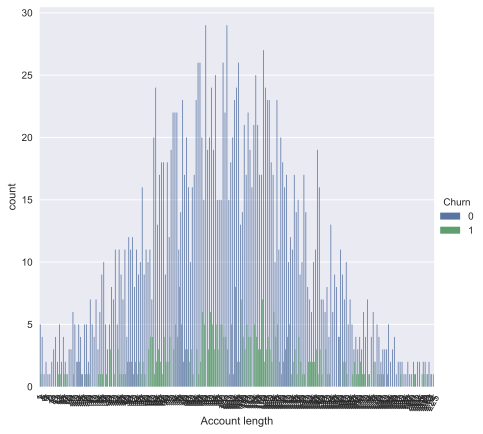

In [423]:
sns.factorplot(x='Account length', hue='Churn', data=data, kind='count', size = 6).set_xticklabels(rotation=60)

Четкой связи между признаками Account length и Churn нет. Этот признак будет мешать построению модели. Удалим его в конце задания.

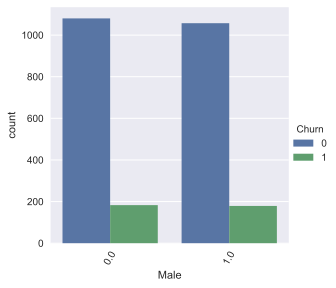

In [215]:
sns.factorplot(x='Male', hue='Churn', data=data, kind='count', size = 4).set_xticklabels(rotation=60)

Sex никак не влияет на значение целевой переменной. Удалим его.
В итоге мы удалим такие признаки:

In [216]:
data.drop(['Male', 'Age', 'Account length', 'Phone number'], axis=1, inplace=True)
data.head()

,State,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Total charge,Customer service calls,Churn,x0_International,"x0_International, Voice mail",x0_None,x0_Voice mail
0,0,174.4,75.0,169.9,80.0,201.6,130.0,11.0,4.0,5613.0,1,0,0.0,0.0,0.0,1.0
1,1,185.8,119.0,192.3,83.0,200.0,96.0,6.6,4.0,5872.0,1,0,0.0,0.0,1.0,0.0
2,2,224.9,105.0,250.0,101.0,216.1,73.0,6.7,5.0,7101.0,3,1,0.0,0.0,1.0,0.0
3,3,128.2,87.0,133.2,105.0,177.6,123.0,11.2,2.0,4412.0,1,0,0.0,0.0,1.0,0.0
4,4,157.1,134.0,184.9,122.0,197.2,59.0,8.5,5.0,5360.0,4,1,0.0,0.0,1.0,0.0


### Задание 10  
  
Рассмотрим основанную на правилах модель для предсказания оттока клиентов: 
* Если у пользователя подключен роуминг (International plan) & клиент звонил в тех. поддержку более 3-х раз => клиент уйдет (Churn = True)
* Иначе => клиент останется (Churn = False)  
  
  
Оцените качество данной модели на 5-fold валидации из 5 повторений. Для оценки качества рассмотрите различные метрики: F1-score, precision, recall, accuracy, balanced accuracy. Дайте комментарий к оценке.

In [217]:
data.loc[(((data['x0_International'] == 1) | (data['x0_International, Voice mail'] == 1)) & (data['Customer service calls'] >= 3)), 'Model churn'] = 1  
data['Model churn'].fillna(0, inplace=True)

In [218]:
data.head()

,State,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Total charge,Customer service calls,Churn,x0_International,"x0_International, Voice mail",x0_None,x0_Voice mail,Model churn
0,0,174.4,75.0,169.9,80.0,201.6,130.0,11.0,4.0,5613.0,1,0,0.0,0.0,0.0,1.0,0.0
1,1,185.8,119.0,192.3,83.0,200.0,96.0,6.6,4.0,5872.0,1,0,0.0,0.0,1.0,0.0,0.0
2,2,224.9,105.0,250.0,101.0,216.1,73.0,6.7,5.0,7101.0,3,1,0.0,0.0,1.0,0.0,0.0
3,3,128.2,87.0,133.2,105.0,177.6,123.0,11.2,2.0,4412.0,1,0,0.0,0.0,1.0,0.0,0.0
4,4,157.1,134.0,184.9,122.0,197.2,59.0,8.5,5.0,5360.0,4,1,0.0,0.0,1.0,0.0,0.0


In [219]:
data['Model churn'] = data['Model churn'].astype('int64')
data['Model churn'].value_counts()

0    2451
1      48
Name: Model churn, dtype: int64

In [220]:
from sklearn import metrics

F1_score = metrics.f1_score(y_pred=data['Model churn'],
y_true=data['Churn'])
precision = metrics.precision_score(y_pred=data['Model churn'],
y_true=data['Churn'])
recall = metrics.recall_score(y_pred=data['Model churn'],
y_true=data['Churn'])
accuracy = metrics.accuracy_score(y_pred=data['Model churn'],
y_true=data['Churn'])
balanced_accuracy = metrics.balanced_accuracy_score(y_pred=data['Model churn'],
y_true=data['Churn'])

print('F1-score:', F1_score,'; precision:', precision, '; recall:', recall, '; accuracy:', accuracy, '; balanced_accuracy:', balanced_accuracy)

F1-score: 0.10243902439024388 ; precision: 0.4375 ; recall: 0.058011049723756904 ; accuracy: 0.8527410964385754 ; balanced_accuracy: 0.5226882576648733


Мы видим, что доля правильных ответов алгоритма достаточно высока (высокая доля Accuracy). 
Precision (доля объектов, названных классификатором 1 и при этом действительно являющимися 1) составляет практически 50%, 
в отличие от recall, показывающий долю объектов класса 1, который нашел алгоритм из всех объектов класса 1.
Среднее гармоническое precision и recall - F1-score достаточно низкий (10%)

In [221]:
data.drop(['Model churn'], axis=1, inplace=True)

In [222]:
data.head()

,State,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Total charge,Customer service calls,Churn,x0_International,"x0_International, Voice mail",x0_None,x0_Voice mail
0,0,174.4,75.0,169.9,80.0,201.6,130.0,11.0,4.0,5613.0,1,0,0.0,0.0,0.0,1.0
1,1,185.8,119.0,192.3,83.0,200.0,96.0,6.6,4.0,5872.0,1,0,0.0,0.0,1.0,0.0
2,2,224.9,105.0,250.0,101.0,216.1,73.0,6.7,5.0,7101.0,3,1,0.0,0.0,1.0,0.0
3,3,128.2,87.0,133.2,105.0,177.6,123.0,11.2,2.0,4412.0,1,0,0.0,0.0,1.0,0.0
4,4,157.1,134.0,184.9,122.0,197.2,59.0,8.5,5.0,5360.0,4,1,0.0,0.0,1.0,0.0


## Часть 2. Методы машинного обучения <a id="part2"></a>

*Вес в общей оценке - 0.5*

Продолжаем работать с данными по оттоку клиентов.  
Сформулируем задачу машинного обучения: необходимо построить модель, определяющую, останется клиент или уйдет. 
  
Для решения заданий, представленных ниже, необходимо использовать данные, полученные после выполнения всех преобразований в первой части. 

### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [223]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x = data.drop('Churn', axis=1)
y = data['Churn']
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

In [224]:
dtree_model = DecisionTreeClassifier(max_depth=5)

In [225]:
splits = [(i, j) for (i,j) in skf.split(x, y)]

In [226]:
for train_index, test_index in splits:
    dtree_model.fit(x.iloc[train_index], y.iloc[train_index])
    preds = dtree_model.predict(x.iloc[test_index])
    print("Accuracy:",
    round(metrics.accuracy_score(y.iloc[test_index], preds), 5),
    '\nBalanced accuracy:',
    round(metrics.balanced_accuracy_score(y.iloc[test_index], preds), 5))
    print(metrics.classification_report(y.iloc[test_index], preds))



Accuracy: 0.968 
Balanced accuracy: 0.89467
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       428
           1       0.98      0.79      0.88        72

    accuracy                           0.97       500
   macro avg       0.97      0.89      0.93       500
weighted avg       0.97      0.97      0.97       500

Accuracy: 0.962 
Balanced accuracy: 0.87961
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       428
           1       0.96      0.76      0.85        72

    accuracy                           0.96       500
   macro avg       0.96      0.88      0.92       500
weighted avg       0.96      0.96      0.96       500

Accuracy: 0.952 
Balanced accuracy: 0.83562
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       427
           1       1.00      0.67      0.80        73

    accuracy                           0.95       

In [227]:
import graphviz
from sklearn.tree import export_graphviz

In [228]:
dot_data = export_graphviz(dtree_model, 
                           out_file=None, 
                           feature_names=x.columns, 
                           class_names=['0', '1'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("Telecom_dtree_model") 

'Telecom_dtree_model.pdf'

In [229]:
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
splits = [(i, j) for (i,j) in skf.split(x, y)]

Accuracy: 0.938


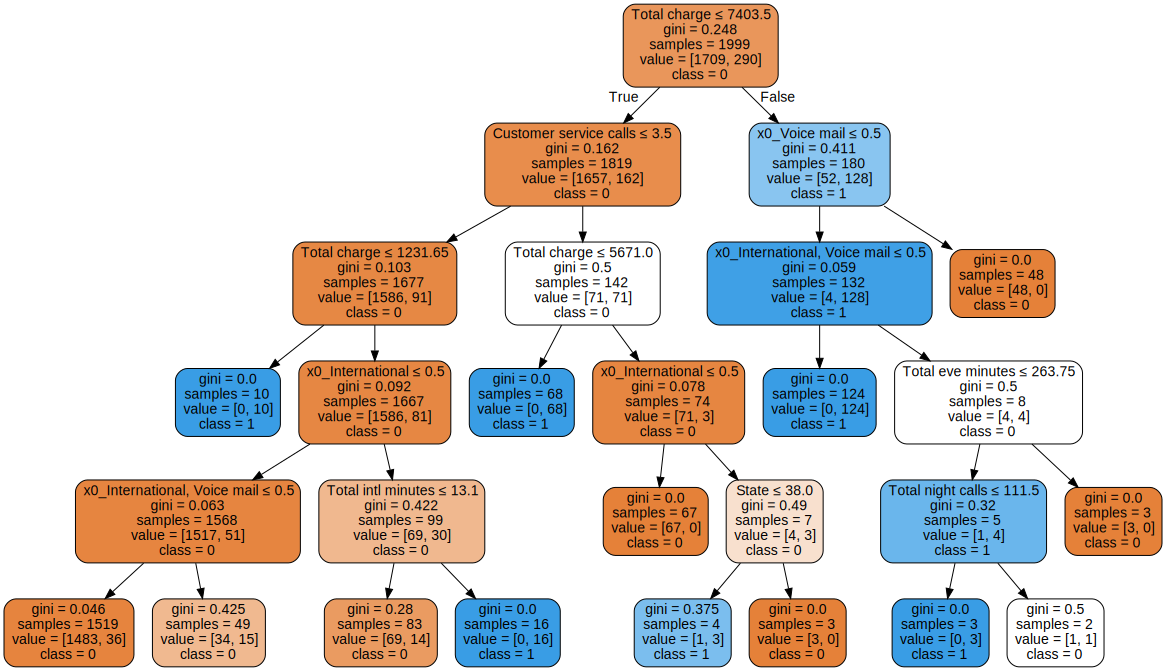

Accuracy: 0.97


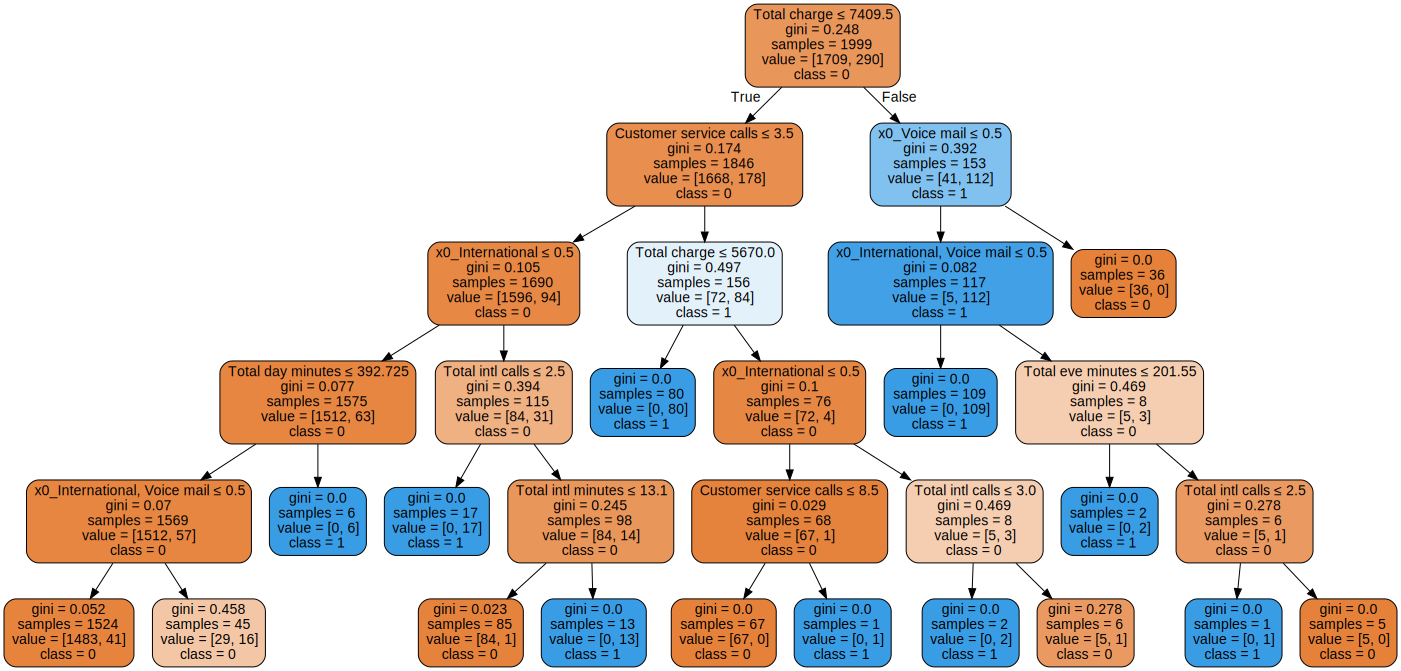

Accuracy: 0.968


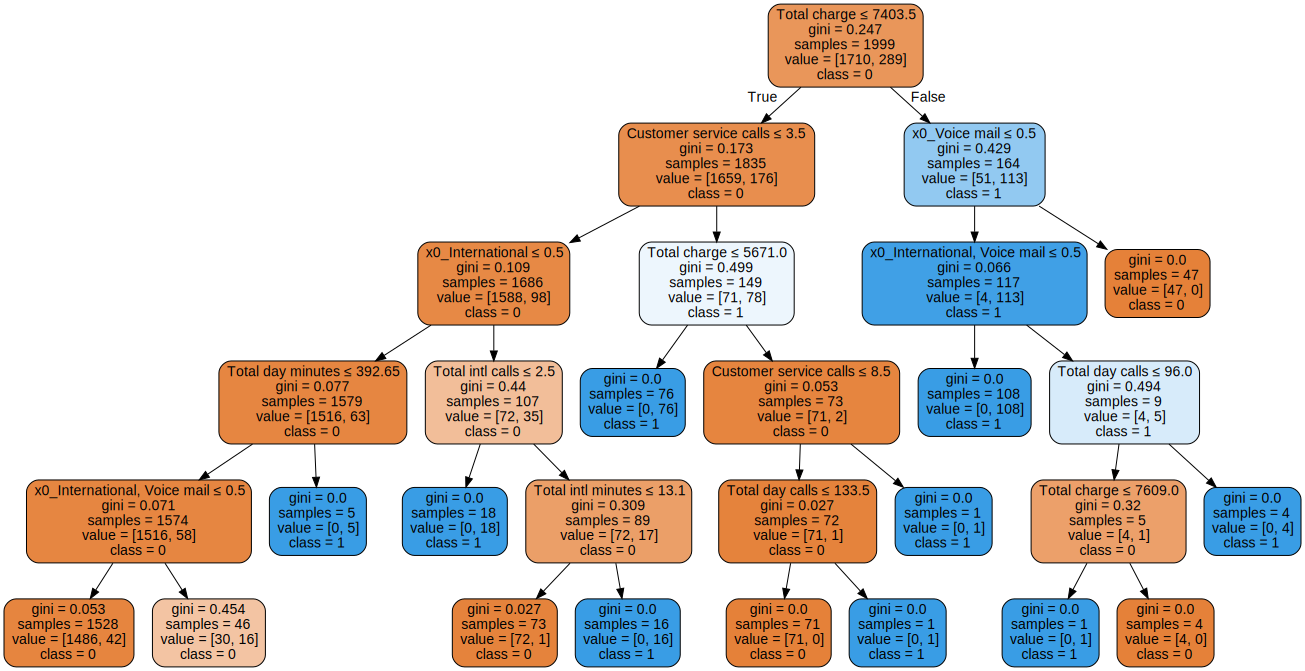

Accuracy: 0.97


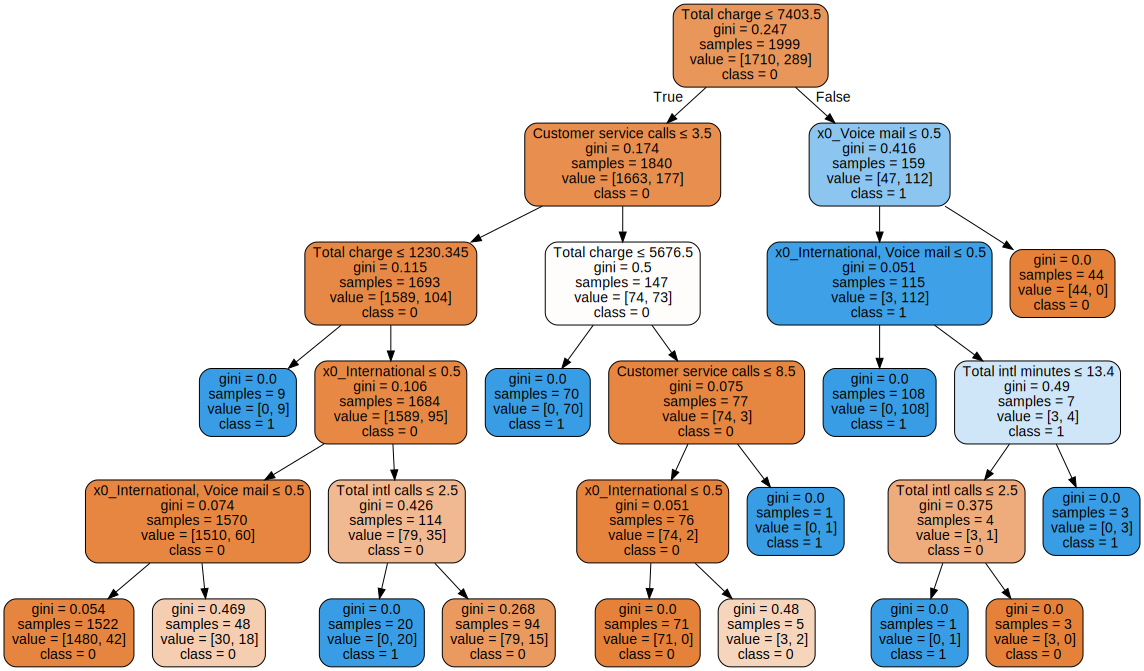

Accuracy: 0.96393


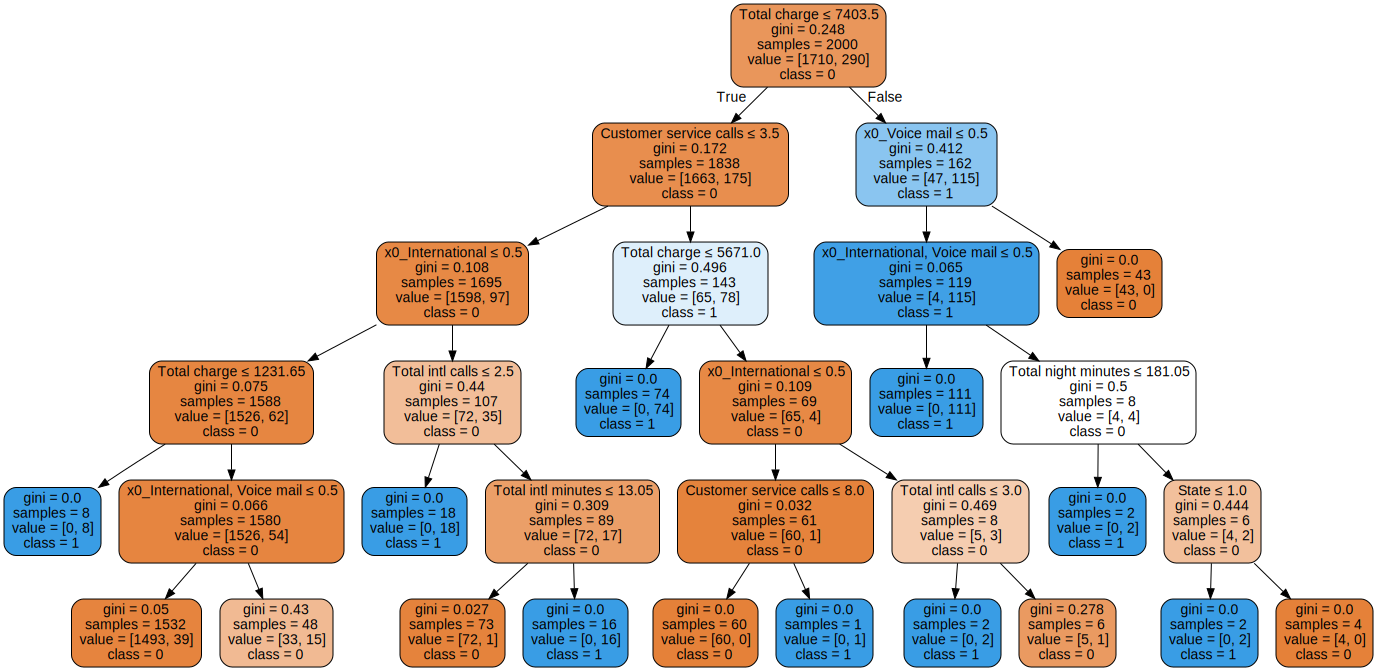

In [230]:
for train_index, test_index in splits:
    dtree_model = DecisionTreeClassifier(max_depth=5)
    dtree_model.fit(x.iloc[train_index], y.iloc[train_index])
    preds = dtree_model.predict(x.iloc[test_index])
    print("Accuracy:",
    round(metrics.accuracy_score(y.iloc[test_index], preds), 5))
    dot_data = export_graphviz(dtree_model, 
                           out_file=None, 
                           feature_names=x.columns, 
                           class_names=['0', '1'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

    graph = graphviz.Source(dot_data)
    display(graph)

Вопросы не сильно различаются на различных итерациях 5-fold валидации, основное различие - порядок этих вопросов. В целом моделей интересует количество звонков, количество минут в день и план International. 

Пройдемся по одной из ветвей дерева решений на первой итерации. Сначала спрашиватся "Общая сумма оплаты за услуги" меньше 7409,5? 
Если да, то спрашивается "Количество звонков в сервис меньше 3,5" (вопрос достаточно логичный)? 
Если да, то спрашивается "План International <= 0.5 (т.е. не подключен)"?
Если да, то спрашивается "Количество минут в день <= 392.725"?
Если да, то спрашивается "План International, Voice mail <= 0.5 (т.е. не подключен)"
Если да, то объект принадлежит классу 0, то есть не уходит клиент.

### Задание 2  
  
На кросс-валидации (5-fold из 5 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [231]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [232]:
from sklearn import ensemble
from sklearn.model_selection import learning_curve
from sklearn import tree
from sklearn import metrics

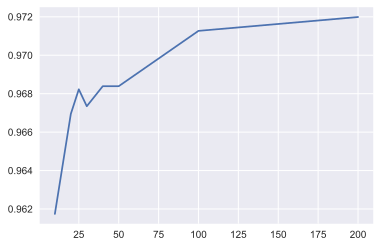

In [233]:
num_trees = [10, 20, 25, 30, 40, 50, 100, 200]
accuracies = []
accuracies_train = []
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
splits = [(i, j) for (i,j) in skf.split(x, y)]
for n_est in num_trees:
    rf_classifier = ensemble.RandomForestClassifier(n_estimators = n_est)
    acc = []
    acc_train = []
    for train_index, test_index in splits:
        rf_classifier.fit(x.iloc[train_index], y.iloc[train_index])
        preds = rf_classifier.predict(x.iloc[test_index])
        acc.append(metrics.accuracy_score(y.iloc[test_index], preds))
    accuracies.append(np.mean(acc))
plt.plot(num_trees, accuracies)

Как мы видим, оптимально взять 25 деревьев, потому что далее качество модели (accuracy_score) меняется не так значительно.

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации из 5 повторений. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Разделите данные на обучающую и тестовую выборки в пропорциях 70:30 (сохраните seed). Обучите Random Forest  с настроенными параметрами на обучающей выборке. На тестовой выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [234]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import time

In [337]:
(trainData, testData, train_label, test_label) = train_test_split(data.drop('Churn', axis=1), data['Churn'], test_size=0.3,
random_state=5)

In [236]:
rf_model = RandomForestClassifier()

In [237]:
param_grid = {'n_estimators': [i for i in range(1, 41, 5)], 'max_features' : ["auto", "sqrt", "log2"],
'max_depth': [i for i in range(1, 20)], 'min_samples_split' : [2, 5, 10],
'min_samples_leaf': [1, 2, 4]}

In [238]:
start = time.time()
cv_rs = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42,
scoring='f1', n_jobs=-1)
cv_rs.fit(trainData, train_label)
end=time.time()
print(end-start)

26.14531707763672


In [239]:
print(cv_rs.best_params_)

{'n_estimators': 31, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


In [240]:
rf_model = RandomForestClassifier(n_estimators=cv_rs.best_params_.get("n_estimators"),
min_samples_split=cv_rs.best_params_.get("min_samples_split"),
min_samples_leaf=cv_rs.best_params_.get("min_samples_leaf"),
max_features=cv_rs.best_params_.get("max_features"),
max_depth=cv_rs.best_params_.get("max_depth"))
rf_model.fit(trainData, train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=31,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [241]:
preds = rf_model.predict(testData)

In [242]:
print('F1-Score:', metrics.f1_score(test_label, preds), 'Accuracy: ', metrics.accuracy_score(test_label, preds)) #score ensemble

F1-Score: 0.8411214953271028 Accuracy:  0.9546666666666667


In [243]:
f1 = metrics.f1_score(test_label, preds)
f1_sc = []
for i in range(len(rf_model.estimators_)):
    rf_model.estimators_[i].fit(trainData, train_label)
    preds = rf_model.estimators_[i].predict(testData)
    print('F1-Score', i + 1, ':', metrics.f1_score(test_label, preds)) #score each tree
    f1_sc.append(metrics.f1_score(test_label, preds))

F1-Score 1 : 0.6596858638743456
F1-Score 2 : 0.7592592592592592
F1-Score 3 : 0.7713004484304933
F1-Score 4 : 0.7610619469026547
F1-Score 5 : 0.798165137614679
F1-Score 6 : 0.7685589519650655
F1-Score 7 : 0.8090909090909091
F1-Score 8 : 0.6933333333333332
F1-Score 9 : 0.6915887850467289
F1-Score 10 : 0.6105263157894737
F1-Score 11 : 0.8148148148148148
F1-Score 12 : 0.7014218009478673
F1-Score 13 : 0.7368421052631579
F1-Score 14 : 0.7962962962962963
F1-Score 15 : 0.7841409691629957
F1-Score 16 : 0.7699530516431924
F1-Score 17 : 0.6826923076923077
F1-Score 18 : 0.48514851485148514
F1-Score 19 : 0.6051282051282051
F1-Score 20 : 0.7417840375586856
F1-Score 21 : 0.7063829787234044
F1-Score 22 : 0.6543778801843317
F1-Score 23 : 0.8177777777777777
F1-Score 24 : 0.6940639269406392
F1-Score 25 : 0.6872246696035242
F1-Score 26 : 0.7466666666666666
F1-Score 27 : 0.823529411764706
F1-Score 28 : 0.7652173913043478
F1-Score 29 : 0.7454545454545455
F1-Score 30 : 0.53125
F1-Score 31 : 0.809090909090909

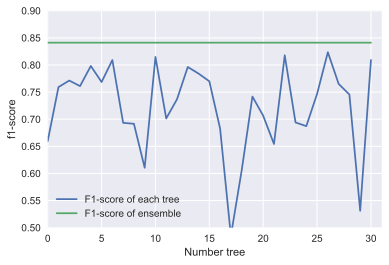

In [244]:
plt.axis([0, len(rf_model.estimators_), 0.5, 0.9])
plt.xlabel('Number tree')
plt.ylabel('f1-score')
plt.plot([i for i in range(len(rf_model.estimators_))], f1_sc, label='F1-score of each tree')
plt.plot([i for i in range(len(rf_model.estimators_))], [f1 for i in range(len(rf_model.estimators_))], label='F1-score of ensemble')
plt.legend()
plt.show()

Feature: 0, Score: 0.02010
Feature: 1, Score: 0.11295
Feature: 2, Score: 0.02655
Feature: 3, Score: 0.03150
Feature: 4, Score: 0.02166
Feature: 5, Score: 0.02461
Feature: 6, Score: 0.02858
Feature: 7, Score: 0.04411
Feature: 8, Score: 0.04323
Feature: 9, Score: 0.31735
Feature: 10, Score: 0.15750
Feature: 11, Score: 0.03932
Feature: 12, Score: 0.01932
Feature: 13, Score: 0.03478
Feature: 14, Score: 0.07846


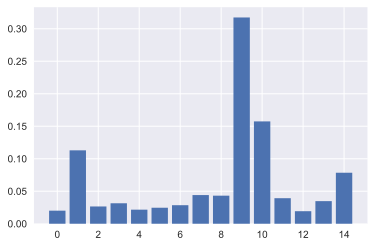

In [245]:
feature_importance = rf_model.feature_importances_

for i,v in enumerate(feature_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(feature_importance))], feature_importance)
pyplot.show()

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         2499 non-null   int64  
 1   Total day minutes             2499 non-null   float64
 2   Total day calls               2499 non-null   float64
 3   Total eve minutes             2499 non-null   float64
 4   Total eve calls               2499 non-null   float64
 5   Total night minutes           2499 non-null   float64
 6   Total night calls             2499 non-null   float64
 7   Total intl minutes            2499 non-null   float64
 8   Total intl calls              2499 non-null   float64
 9   Total charge                  2499 non-null   float64
 10  Customer service calls        2499 non-null   int64  
 11  Churn                         2499 non-null   int64  
 12  x0_International              2499 non-null   float64
 13  x0_

Важнее всего признаки: Total charge, Customer service calls, Total day minute. По логике важность признаков распределена не идеально, учитывая, что особенно важным должен быть признак x0_International.

### Задание 4  
  
* Используйте логистическую регрессию для решения задачи, подберите оптимальные значения гипермараметров. Оцените качество (roc auc) на 5-fold валидации из 5 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Разделите данные на обучающую и тестовую выборки в пропорциях 70:30 (используйте тот же seed, что и в Задании 3). На обучающей выборке обучите логистическую регрессию и Random Forest  с настроенными параметрами. Для обеих моделей оцените качество на тестовой выборке - постройте ROC-кривую, вычислите roc auc.

In [247]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
 
lgr_model = LogisticRegression()

In [248]:
param_grid = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
 
start = time.time()
cv_rs = RandomizedSearchCV(estimator=lgr_model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, scoring='f1', 
                           n_jobs=-1)
cv_rs.fit(trainData, train_label)
end=time.time()
print(end-start)
 
print(cv_rs.best_params_)

19.271257162094116
{'solver': 'newton-cg', 'C': 0.8}


In [249]:
lgr_model = LogisticRegression(penalty="l2", solver=cv_rs.best_params_.get('solver'), C=cv_rs.best_params_.get("C"))

In [250]:
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
splits = [(i, j) for (i,j) in skf.split(x, y)]

cs_lgr = []
cs_rf = []
f1_lgr = []
f1_rf = []
for train_index, test_index in splits:
    lgr_model.fit(x.iloc[train_index], y.iloc[train_index])
    rf_model.fit(x.iloc[train_index], y.iloc[train_index])
    preds_1 = lgr_model.predict(x.iloc[test_index])
    preds_2 = rf_model.predict(x.iloc[test_index])
    cs_lgr.append(metrics.roc_auc_score(y.iloc[test_index], preds_1))
    cs_rf.append(metrics.roc_auc_score(y.iloc[test_index], preds_2))
    f1_lgr.append(metrics.f1_score(y.iloc[test_index], preds_1))
    f1_rf.append(metrics.f1_score(y.iloc[test_index], preds_2))

In [251]:
print("AUC Random Forest classifier", np.mean(cs_rf))
print("F1 Random Forest classifier", np.mean(f1_rf))

AUC Random Forest classifier 0.8847888194064876
F1 Random Forest classifier 0.8634850269838182


In [252]:
print("AUC Logistic Regression", np.mean(cs_lgr))
print("F1 Logistic Regression", np.mean(f1_lgr))

AUC Logistic Regression 0.5834468576228411
F1 Logistic Regression 0.28493697657321987


In [253]:
lgr_model.fit(trainData, train_label)
preds = lgr_model.predict(testData)

In [254]:
fpr, tpr, thresholds = metrics.roc_curve(test_label, preds, pos_label=1)
roc_auc = auc(fpr, tpr)

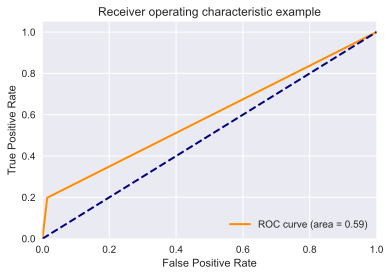

In [255]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [256]:
rf_model.fit(trainData, train_label)
preds = rf_model.predict(testData)

In [257]:
fpr, tpr, thresholds = metrics.roc_curve(test_label, preds, pos_label=1)
roc_auc = auc(fpr, tpr)

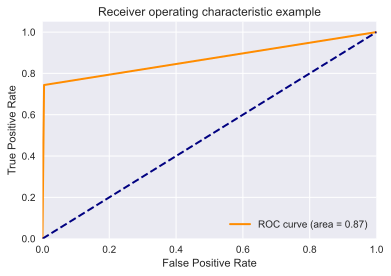

In [258]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Задание 5  
  
Для алгоритма AdaBoost с параметрами по умолчанию оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты. 

In [259]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

num_trees = list(range(1, 18))
accuracies = []
accuracies_train = []
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
splits = [(i, j) for (i,j) in skf.split(x, y)]
for n_est in num_trees:
    clf = AdaBoostClassifier(n_estimators=n_est)
    acc = []
    acc_train = []
    for train_index, test_index in splits:
        clf.fit(x.iloc[train_index], y.iloc[train_index])
        preds = clf.predict(x.iloc[test_index])
        preds_train = clf.predict(x.iloc[train_index])
        acc.append(metrics.accuracy_score(y.iloc[test_index], preds))
        acc_train.append(metrics.accuracy_score(y.iloc[train_index], preds_train))
    accuracies.append(np.mean(acc))
    accuracies_train.append(np.mean(acc_train))

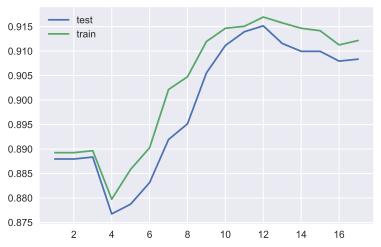

In [260]:
plt.plot(num_trees, accuracies, label='test')
plt.plot(num_trees, accuracies_train, label='train')
plt.legend()
plt.show()

### Задание 6  
  
* Настройте гиперпараметры AdaBoost на 5-fold валидации, используя в качестве базовых классификаторов дерево решений и SVM. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.    
* Выведите наилучшую конфигурацию параметров для каждого базового классификатора. Сравните качество. 

In [261]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    'learning_rate': np.arange(0.05, 0.31, 0.05),
    'n_estimators': [100], 'algorithm': ['SAMME', 'SAMME.R']
}
ada_model = AdaBoostClassifier(SVC(probability=True, kernel='linear', max_iter = 1500, tol = 0.01))

start = time.time()
cv_rs = RandomizedSearchCV(estimator=ada_model, param_distributions=param_grid, cv=5,
scoring='f1', n_jobs=2)
cv_rs.fit(trainData, train_label)
end=time.time()
print(end-start)

651.494528055191


In [262]:
print(cv_rs.best_params_)

{'n_estimators': 100, 'learning_rate': 0.1, 'algorithm': 'SAMME'}


In [263]:
ada_model = AdaBoostClassifier(SVC(probability=True, kernel='linear', max_iter=1500, tol=0.01), learning_rate=cv_rs.best_params_.get("learning_rate"), n_estimators=cv_rs.best_params_.get("n_estimators"), algorithm=cv_rs.best_params_.get("algorithm"))
ada_model.fit(trainData, train_label)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='scale', kernel='linear',
                                      max_iter=1500, probability=True,
                                      random_state=None, shrinking=True,
                                      tol=0.01, verbose=False),
                   learning_rate=0.1, n_estimators=100, random_state=None)

In [264]:
preds = ada_model.predict(testData)
print('F1-Score:', metrics.f1_score(test_label, preds), 'Accuracy: ', metrics.accuracy_score(test_label, preds)) #score ensemble

F1-Score: 0.2821576763485477 Accuracy:  0.5386666666666666


In [338]:
param_grid = {
    'learning_rate': np.arange(0.05, 0.31, 0.05),
    'n_estimators': [100], 'algorithm': ['SAMME', 'SAMME.R']
}
ada_model = AdaBoostClassifier()

start = time.time()
cv_rs = RandomizedSearchCV(estimator=ada_model, param_distributions=param_grid, cv=5,
scoring='f1', n_jobs=-1)
cv_rs.fit(trainData, train_label)
end=time.time()
print(end-start)

8.16914677619934


In [339]:
print(cv_rs.best_params_)

{'n_estimators': 100, 'learning_rate': 0.25, 'algorithm': 'SAMME.R'}


In [340]:
ada_model = AdaBoostClassifier(learning_rate=cv_rs.best_params_.get("learning_rate"), n_estimators=cv_rs.best_params_.get("n_estimators"), algorithm=cv_rs.best_params_.get("algorithm"))
ada_model.fit(trainData, train_label)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.25,
                   n_estimators=100, random_state=None)

In [341]:
preds = ada_model.predict(testData)
print('F1-Score:', metrics.f1_score(test_label, preds), 'Accuracy: ', metrics.accuracy_score(test_label, preds)) #score ensemble

F1-Score: 0.5668449197860963 Accuracy:  0.892


Качество модели достаточно плохое по сравнению с предыдущими вариантами при использовании SVM, учитывая что это заняло еще достаточно много времени. При использовании Decision tree точность повысилась до уровня предыдущих моделей.

### Задание 7  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Разделите данные на обучающую и тестовую выборки в пропорциях 70:30 (используйте тот же seed, что и в Задании 3). Обучите модель с настроенными параметрами на обучающей выборке. На тестовой выборке оцените качество. Сравните с предыдущими моделями, дайте комментарий.  
* Оцените важность признаков в обученной модели с оптимальными параметрами. 

In [269]:
%pylab inline
#from sklearn import ensemble , cross_validation, learning_curve, metrics 
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

Populating the interactive namespace from numpy and matplotlib


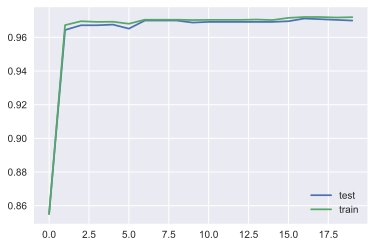

In [270]:
xgb_scoring = []
mass = []
for i in range(20):
    mass.append(i)

accuracies = []
accuracies_train = []
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
splits = [(i, j) for (i,j) in skf.split(x, y)]
for n_est in mass:
    clf = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_est, min_child_weight=3)
    xgb_scoring = []
    xgb_scoring_train = []
    for train_index, test_index in splits:
        clf.fit(x.iloc[train_index], y.iloc[train_index])
        preds = clf.predict(x.iloc[test_index])
        preds_train = clf.predict(x.iloc[train_index])
        xgb_scoring.append(metrics.accuracy_score(y.iloc[test_index], preds))
        xgb_scoring_train.append(metrics.accuracy_score(y.iloc[train_index], preds_train))
    accuracies.append(np.mean(xgb_scoring))
    accuracies_train.append(np.mean(xgb_scoring_train))
plt.plot(mass, accuracies, label='test')
plt.plot(mass, accuracies_train, label='train')
plt.legend()
plt.show()

In [271]:
# XGB parameters
param_grid = {
    'learning_rate': np.arange(0.05, 0.31, 0.05),
    'max_depth': np.arange(5, 16, 1, dtype=int),
    'min_child_weight': np.arange(1, 8, 1, dtype=int),
    'colsample_bytree': np.arange(0.3, 0.8, 0.1),
    'subsample': [0.8, 1], 'n_estimators': [100]
}
model = xgb.XGBClassifier()

In [272]:
#RandomizedSearchCV
start = time.time()
cv_rs = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5,
scoring='f1', n_jobs=-1)
cv_rs.fit(trainData, train_label)
end=time.time()
print(end-start)

3.5903966426849365


In [273]:
print(cv_rs.best_params_)

{'subsample': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6000000000000001}


In [274]:
model = xgb.XGBClassifier(learning_rate=cv_rs.best_params_.get("learning_rate"), max_depth=cv_rs.best_params_.get("max_depth"), n_estimators=cv_rs.best_params_.get("n_estimators"), min_child_weight=cv_rs.best_params_.get("min_child_weight"))
model.fit(trainData, train_label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [275]:
preds = model.predict(testData)
print('F1-Score:', metrics.f1_score(test_label, preds), 'Accuracy: ', metrics.accuracy_score(test_label, preds)) #score ensemble

F1-Score: 0.8727272727272728 Accuracy:  0.9626666666666667


Очень высокая оценка Accuracy, при высоком значении F1-Score. Можно сказать, что модель является лучшей по сравнению с предыдущими моделями, у которых оценки были ниже на десятую часть.

Нужно ожидать, что в 3й части данная модель будет оптимальна.

Feature: 0, Score: 0.01645
Feature: 1, Score: 0.04115
Feature: 2, Score: 0.02516
Feature: 3, Score: 0.01999
Feature: 4, Score: 0.02353
Feature: 5, Score: 0.02583
Feature: 6, Score: 0.02028
Feature: 7, Score: 0.04512
Feature: 8, Score: 0.06107
Feature: 9, Score: 0.19710
Feature: 10, Score: 0.12994
Feature: 11, Score: 0.05753
Feature: 12, Score: 0.06939
Feature: 13, Score: 0.03352
Feature: 14, Score: 0.23396


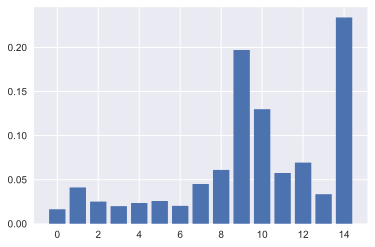

In [276]:
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [277]:
data.head()

,State,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Total charge,Customer service calls,Churn,x0_International,"x0_International, Voice mail",x0_None,x0_Voice mail
0,0,174.4,75.0,169.9,80.0,201.6,130.0,11.0,4.0,5613.0,1,0,0.0,0.0,0.0,1.0
1,1,185.8,119.0,192.3,83.0,200.0,96.0,6.6,4.0,5872.0,1,0,0.0,0.0,1.0,0.0
2,2,224.9,105.0,250.0,101.0,216.1,73.0,6.7,5.0,7101.0,3,1,0.0,0.0,1.0,0.0
3,3,128.2,87.0,133.2,105.0,177.6,123.0,11.2,2.0,4412.0,1,0,0.0,0.0,1.0,0.0
4,4,157.1,134.0,184.9,122.0,197.2,59.0,8.5,5.0,5360.0,4,1,0.0,0.0,1.0,0.0


Важны признаки: x0_Voice mail, Churn, Customer service calls, x0_International. Это достаточно логично для нашей задачи.

## Часть 3. Соревнование по машинному обучению <a id="part3"></a>

*Вес в общей оценке - 0.3*

В данном задании вам предлагается принять участие в [Inclass соревновании](https://www.kaggle.com/t/b25354482b484011b3b782da84d61186) на Kaggle.  
Задача соревнования заключается в том, чтобы как можно лучше решить задачу предсказания оттока клиентов.  
  
Метрикой качества (точности) решения в данном соревновании является **ROC AUC**. 

Для участия в соревновании, т.е. для того, чтобы сабмитить результаты, вам необходимо создать аккаунт на [kaggle](https://www.kaggle.com/).

После того, как вы выполните сабмит, в leaderboard вы сможете посмотреть качество вашей модели на тестовой выборке и место в общем зачете.  
Вы можете делать много (до 10 в день) сабмитов - в leaderbord всегда отображается самый лучший (остальные можно посмотреть в `My Submissions`).

**NB:** Обратите внимание, что текущий рейтинг (до конца соревнования) строится только на части тестовых данных. После окончания соревнования рейтинг будет пересчитан на всех данных и позиции могут измениться.
Вы можете сами выбрать три модели (сабмита), которые будут провалидированы на всех данных. По умолчанию будут выбраны три модели, давшие лучший результат в текущем рейтинге.

### Задание  
  
Необходимо построить и засабмитить модель, которая:   
* Задача минимум – покажет на тестовой выборке качество выше baseline: TBD
* Задача максимум - решит задачу как можно точнее.  
  
При решении можно и нужно выполнять различные преобразования признаков и применять различные модели машинного обучения.  

В качестве результата необходимо: 
* Сказать ваш логин на kaggle, чтобы мы могли распознать вас в leaderboard. 
* Для лучшей модели:
    * Предоставить скрипт\ноутбук, выполнив который можно получить файл для сабмита (чтобы можно было воспроизвести ваш результат). Также необходимо предоставить саму сохраненную модель.  
    * Предоставить скрипт\ноутбук для преобразования данных и обучения лучшей модели. 
    * (Опционально) Предоставить ноутбук с результатами для других моделей\сабмитов, которые вы пробовали.  
  
По результатам будет составлен наш локальный leaderboard, и по нему будут определены баллы за задание. 

### Баллы за место в итоговом рейтинге  
  
* 1-5 место: 10 баллов
* 6-10 место: 9 баллов  
* 11-15 место: 8 баллов
* 16-25 место: 7 баллов  
* 26-35 место: 6 баллов
* 36-50 место: 5 баллов
* 51-65 место: 4 балла
* 66-80 место: 3 балла
* 81-... место: 2 балла  
  
**NB:** Чтобы получить баллы за соревнование, нужно превзойти baseline. В противном случае будет 0 баллов. 

In [278]:
import warnings
warnings.filterwarnings('ignore')

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [280]:
trainData = data.drop(['Churn'], axis=1)
trainDependentVariables = data['Churn']
data_test = pd.read_csv('test.csv', sep=';')
trainData

,State,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Total charge,Customer service calls,x0_International,"x0_International, Voice mail",x0_None,x0_Voice mail
0,0,174.4,75.0,169.9,80.0,201.6,130.0,11.0,4.0,5613.0,1,0.0,0.0,0.0,1.0
1,1,185.8,119.0,192.3,83.0,200.0,96.0,6.6,4.0,5872.0,1,0.0,0.0,1.0,0.0
2,2,224.9,105.0,250.0,101.0,216.1,73.0,6.7,5.0,7101.0,3,0.0,0.0,1.0,0.0
3,3,128.2,87.0,133.2,105.0,177.6,123.0,11.2,2.0,4412.0,1,0.0,0.0,1.0,0.0
4,4,157.1,134.0,184.9,122.0,197.2,59.0,8.5,5.0,5360.0,4,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,29,193.7,108.0,186.6,98.0,223.0,100.0,11.6,8.0,6196.0,0,1.0,0.0,0.0,0.0
2495,24,191.4,116.0,167.4,99.0,216.5,112.0,14.0,5.0,6029.0,3,0.0,0.0,1.0,0.0
2496,0,315.6,105.0,208.9,71.0,260.1,123.0,12.1,3.0,8638.0,3,0.0,0.0,0.0,1.0
2497,23,251.5,105.0,212.8,104.0,157.8,67.0,9.3,4.0,7046.0,0,1.0,0.0,0.0,0.0


In [281]:
trainDependentVariables

0       0
1       0
2       1
3       0
4       1
       ..
2494    0
2495    0
2496    0
2497    0
2498    0
Name: Churn, Length: 2499, dtype: int64

In [282]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      834 non-null    int64  
 1   Sex                     834 non-null    object 
 2   Age                     576 non-null    float64
 3   State                   834 non-null    object 
 4   Account length          834 non-null    int64  
 5   Phone number            834 non-null    object 
 6   Plans                   805 non-null    object 
 7   Number vmail messages   834 non-null    int64  
 8   Total day minutes       834 non-null    object 
 9   Total day calls         834 non-null    object 
 10  Total day charge        834 non-null    float64
 11  Total eve minutes       834 non-null    float64
 12  Total eve calls         834 non-null    float64
 13  Total eve charge        834 non-null    float64
 14  Total night minutes     834 non-null    ob

In [283]:
data_test.drop(['ID', 'Phone number',  'Sex', 'Age', 'Account length', 'Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'], axis=1, inplace=True)
data_test.head()


,State,Plans,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Total charge,Customer service calls
0,TX,Voice mail,183.2,103.0,209.4,111.0,172.4,109.0,11.9,6.0,59.91,1
1,CT,None,124.4,74.0,320.9,78.0,157.2,126.0,10.4,4.0,58.31,2
2,UT,Voice mail,149.4,111.0,131.8,113.0,132.7,87.0,6.7,2.0,44.38,0
3,MO,International,244.8,91.0,60.8,105.0,176.7,110.0,10.7,3.0,57.63,2
4,OR,None,190.4,92.0,317.5,85.0,133.4,113.0,8.3,4.0,67.6,2


In [284]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   834 non-null    object 
 1   Plans                   805 non-null    object 
 2   Total day minutes       834 non-null    object 
 3   Total day calls         834 non-null    object 
 4   Total eve minutes       834 non-null    float64
 5   Total eve calls         834 non-null    float64
 6   Total night minutes     834 non-null    object 
 7   Total night calls       834 non-null    float64
 8   Total intl minutes      834 non-null    object 
 9   Total intl calls        834 non-null    float64
 10  Total charge            834 non-null    object 
 11  Customer service calls  834 non-null    object 
dtypes: float64(4), object(8)
memory usage: 78.3+ KB


In [285]:
A = data_test.isnull()
A.head()
print('Missing values by features:', A.sum(), sep='\n')

Missing values by features:
State                      0
Plans                     29
Total day minutes          0
Total day calls            0
Total eve minutes          0
Total eve calls            0
Total night minutes        0
Total night calls          0
Total intl minutes         0
Total intl calls           0
Total charge               0
Customer service calls     0
dtype: int64


In [286]:
data_test['Plans'].fillna('None', inplace=True)

data_test['Total day minutes'] = data_test['Total day minutes'].str.replace('o','0')
data_test['Total day minutes'] = data_test['Total day minutes'].str.replace(',','.')
data_test['Total day minutes'] = data_test['Total day minutes'].astype('float64')

In [287]:
data_test['Total day calls'] = data_test['Total day calls'].str.replace('o','0')
data_test['Total day calls'] = data_test['Total day calls'].str.replace(',','.')
data_test['Total day calls'] = data_test['Total day calls'].astype('float64')

data_test['Total night minutes'] = data_test['Total night minutes'].str.replace('o','0')
data_test['Total night minutes'] = data_test['Total night minutes'].str.replace(',','.')
data_test['Total night minutes'] = data_test['Total night minutes'].str.replace('l','1')
data_test['Total night minutes'] = data_test['Total night minutes'].astype('float64')
data_test['Total intl minutes'] = data_test['Total intl minutes'].str.replace(',','.')
data_test['Total intl minutes'] = data_test['Total intl minutes'].astype('float64')
data_test['Total charge'] = data_test['Total charge'].apply(lambda x: float(x.replace(' hundred', '')) * 100)
data_test['Total charge'] = data_test['Total charge'].astype('float64')
data_test['Customer service calls'] = data_test['Customer service calls'].str.replace('o','0')
data_test['Customer service calls'] = data_test['Customer service calls'].astype('float64')

In [288]:
transformed = one.fit_transform(data_test.Plans.values.reshape(-1, 1))
one_df = pd.DataFrame(transformed, columns=one.get_feature_names())
data_test = pd.concat([data_test, one_df], axis=1).drop(['Plans'], axis=1)

In [289]:
for i in range(len(uniques)):
    print(uniques[i])
    print(code[i])
    data_test.loc[data_test['State'] == uniques[i], 'State'] = code[i]
    print(data_test['State'].unique())
    
data_test['State'] = data_test['State'].astype('float64')

MN
0
['TX' 'CT' 'UT' 'MO' 'OR' 'WV' 'SD' 'KS' 'ME' 'MA' 'SC' 'WY' 'IN' 0 'KY'
 'IA' 'ID' 'IL' 'TN' 'MT' 'CO' 'NC' 'OH' 'OK' 'WA' 'AK' 'NY' 'NM' 'WI'
 'AR' 'MI' 'NV' 'NE' 'MD' 'DE' 'CA' 'VA' 'DC' 'FL' 'MS' 'AZ' 'VT' 'NJ'
 'ND' 'PA' 'NH' 'LA' 'HI' 'RI' 'GA' 'AL']
AR
1
['TX' 'CT' 'UT' 'MO' 'OR' 'WV' 'SD' 'KS' 'ME' 'MA' 'SC' 'WY' 'IN' 0 'KY'
 'IA' 'ID' 'IL' 'TN' 'MT' 'CO' 'NC' 'OH' 'OK' 'WA' 'AK' 'NY' 'NM' 'WI' 1
 'MI' 'NV' 'NE' 'MD' 'DE' 'CA' 'VA' 'DC' 'FL' 'MS' 'AZ' 'VT' 'NJ' 'ND'
 'PA' 'NH' 'LA' 'HI' 'RI' 'GA' 'AL']
ND
2
['TX' 'CT' 'UT' 'MO' 'OR' 'WV' 'SD' 'KS' 'ME' 'MA' 'SC' 'WY' 'IN' 0 'KY'
 'IA' 'ID' 'IL' 'TN' 'MT' 'CO' 'NC' 'OH' 'OK' 'WA' 'AK' 'NY' 'NM' 'WI' 1
 'MI' 'NV' 'NE' 'MD' 'DE' 'CA' 'VA' 'DC' 'FL' 'MS' 'AZ' 'VT' 'NJ' 2 'PA'
 'NH' 'LA' 'HI' 'RI' 'GA' 'AL']
AL
3
['TX' 'CT' 'UT' 'MO' 'OR' 'WV' 'SD' 'KS' 'ME' 'MA' 'SC' 'WY' 'IN' 0 'KY'
 'IA' 'ID' 'IL' 'TN' 'MT' 'CO' 'NC' 'OH' 'OK' 'WA' 'AK' 'NY' 'NM' 'WI' 1
 'MI' 'NV' 'NE' 'MD' 'DE' 'CA' 'VA' 'DC' 'FL' 'MS' 'AZ' 'VT' 'NJ' 2 'PA'

In [290]:
data_test

,State,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Total charge,Customer service calls,x0_International,"x0_International, Voice mail",x0_None,x0_Voice mail
0,49.0,183.2,103.0,209.4,111.0,172.4,109.0,11.9,6.0,5991.0,1.0,0.0,0.0,0.0,1.0
1,50.0,124.4,74.0,320.9,78.0,157.2,126.0,10.4,4.0,5831.0,2.0,0.0,0.0,1.0,0.0
2,14.0,149.4,111.0,131.8,113.0,132.7,87.0,6.7,2.0,4438.0,0.0,0.0,0.0,0.0,1.0
3,48.0,244.8,91.0,60.8,105.0,176.7,110.0,10.7,3.0,5763.0,2.0,1.0,0.0,0.0,0.0
4,19.0,190.4,92.0,317.5,85.0,133.4,113.0,8.3,4.0,6760.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,18.0,195.7,119.0,106.2,95.0,157.4,94.0,5.3,3.0,5081.0,2.0,0.0,0.0,0.0,1.0
830,10.0,127.4,110.0,103.3,99.0,164.2,73.0,9.1,3.0,4029.0,0.0,0.0,0.0,0.0,1.0
831,3.0,209.5,89.0,172.8,85.0,94.1,102.0,8.8,4.0,5692.0,1.0,0.0,0.0,1.0,0.0
832,4.0,222.8,98.0,180.5,105.0,151.3,101.0,13.0,4.0,6354.0,0.0,0.0,0.0,0.0,1.0


In [291]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         834 non-null    float64
 1   Total day minutes             834 non-null    float64
 2   Total day calls               834 non-null    float64
 3   Total eve minutes             834 non-null    float64
 4   Total eve calls               834 non-null    float64
 5   Total night minutes           834 non-null    float64
 6   Total night calls             834 non-null    float64
 7   Total intl minutes            834 non-null    float64
 8   Total intl calls              834 non-null    float64
 9   Total charge                  834 non-null    float64
 10  Customer service calls        834 non-null    float64
 11  x0_International              834 non-null    float64
 12  x0_International, Voice mail  834 non-null    float64
 13  x0_No

In [292]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [293]:
train = data.drop('Churn', axis=1)
train_labels = data['Churn']

### Random Forest

In [294]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf_model = RandomForestClassifier()

In [295]:
rf_model = RandomForestClassifier()

param_grid = {'n_estimators': [i for i in range(1, 50, 2)], 'max_features' : ["auto", "sqrt", "log2"],
'max_depth': [i for i in range(1, 20)], 'min_samples_split' : [2, 5, 10],
'min_samples_leaf': [1, 2, 4]}

cv_rs = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42,
scoring='roc_auc', n_jobs=-1)
cv_rs.fit(train, train_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [296]:
rf_model = RandomForestClassifier(n_estimators=cv_rs.best_params_.get("n_estimators"),
min_samples_split=cv_rs.best_params_.get("min_samples_split"),
min_samples_leaf=cv_rs.best_params_.get("min_samples_leaf"),
max_features=cv_rs.best_params_.get("max_features"),
max_depth=cv_rs.best_params_.get("max_depth"))
rf_model.fit(train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [297]:
acc = []
for train_index, test_index in splits:
    rf_model.fit(train.iloc[train_index], train_labels.iloc[train_index])
    preds = rf_model.predict(train.iloc[test_index])
    acc.append(metrics.roc_auc_score(train_labels.iloc[test_index], preds))
print(np.mean(acc)) #0,9701086 для 150 #0,8651172 для 100 #0,8919

0.8824740499538389


In [298]:
predicted = rf_model.predict(data_test)

In [299]:
pred = pd.DataFrame({'ID': list(pd.read_csv('test.csv', sep=';')['ID']), 'Churn': list(predicted)})

In [300]:
pred

,ID,Churn
0,10007,0
1,10134,0
2,10464,0
3,10490,0
4,10556,0
...,...,...
829,99221,0
830,99297,0
831,99328,0
832,99400,0


In [301]:
#pred.to_csv('pred.csv', index=False) # 0.88389 cо 150 деревьями
#pred.to_csv('pred_rf_100.csv', index=False) # 0,92934 со 100 деревьями в range (по факту n_est = 7)
#pred.to_csv('pred_rf_50.csv', index=False) # 0,96011 с 50 деревьями в range (по факту n_est = 11)
pred.to_csv('pred_rf_model_50.csv', index=False)

In [302]:
rf_model = RandomForestClassifier()

param_grid = {'n_estimators': [i for i in range(1, 100, 2)], 'max_features' : ["auto", "sqrt", "log2"],
'max_depth': [i for i in range(1, 20)], 'min_samples_split' : [2, 5, 10],
'min_samples_leaf': [1, 2, 4]}

cv_rs = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42,
scoring='roc_auc', n_jobs=-1)
cv_rs.fit(train, train_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [303]:
rf_model = RandomForestClassifier(n_estimators=cv_rs.best_params_.get("n_estimators"),
min_samples_split=cv_rs.best_params_.get("min_samples_split"),
min_samples_leaf=cv_rs.best_params_.get("min_samples_leaf"),
max_features=cv_rs.best_params_.get("max_features"),
max_depth=cv_rs.best_params_.get("max_depth"))
rf_model.fit(train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [304]:
acc = []
for train_index, test_index in splits:
    rf_model.fit(train.iloc[train_index], train_labels.iloc[train_index])
    preds = rf_model.predict(train.iloc[test_index])
    acc.append(metrics.roc_auc_score(train_labels.iloc[test_index], preds))
print(np.mean(acc)) #0,9701086 для 150 #0,8651172 для 100 #0,8919

0.873677830973107


In [305]:
predicted = rf_model.predict(data_test)

In [306]:
pred = pd.DataFrame({'ID': list(pd.read_csv('test.csv', sep=';')['ID']), 'Churn': list(predicted)})

In [307]:
pred

,ID,Churn
0,10007,0
1,10134,0
2,10464,0
3,10490,0
4,10556,0
...,...,...
829,99221,0
830,99297,0
831,99328,0
832,99400,0


In [308]:
pred.to_csv('pred_rf_model_100.csv', index=False) #0,929

In [309]:
rf_model = RandomForestClassifier(n_estimators=11,
min_samples_split=cv_rs.best_params_.get("min_samples_split"),
min_samples_leaf=cv_rs.best_params_.get("min_samples_leaf"),
max_features=cv_rs.best_params_.get("max_features"),
max_depth=cv_rs.best_params_.get("max_depth"))
rf_model.fit(train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [310]:
predicted = rf_model.predict(data_test)

In [311]:
pred = pd.DataFrame({'ID': list(pd.read_csv('test.csv', sep=';')['ID']), 'Churn': list(predicted)})
pred

,ID,Churn
0,10007,0
1,10134,0
2,10464,0
3,10490,0
4,10556,0
...,...,...
829,99221,0
830,99297,0
831,99328,0
832,99400,0


In [312]:
pred.to_csv('pred_rf_model_11.csv', index=False) #0.96011

### BEST: XGBClassifier

In [313]:
clf = xgb.XGBClassifier(learning_rate=0.02, max_depth=10, n_estimators=16, min_child_weight=2, subsample=0.8)
clf.fit(train, train_labels)
predicted = clf.predict(data_test) 

In [314]:
pred = pd.DataFrame({'ID': list(pd.read_csv('test.csv', sep=';')['ID']), 'Churn': list(predicted)})
pred.to_csv('pred_xgb1.csv', index=False) #0.96153

### Черновики: Логистическая регрессия

In [315]:
# from sklearn import preprocessing
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, roc_curve, auc
# from sklearn.model_selection import cross_val_score
 
# lgr_model = LogisticRegression()

# lgr_model = LogisticRegression(max_iter=10000)
# lgr_model.fit(train, train_labels)

# splits = [(i, j) for (i,j) in skf.split(train, train_labels)]
# acc = []
# for train_index, test_index in splits:
#     lgr_model.fit(train.iloc[train_index], train_labels.iloc[train_index])
#     preds = lgr_model.predict(train.iloc[test_index])
#     acc.append(metrics.roc_auc_score(train_labels.iloc[test_index], preds))
# print(np.mean(acc))

# preds = lgr_model.predict(data_test)

# pred = pd.DataFrame({'ID': list(pd.read_csv('test.csv', sep=';')['ID']), 'Churn': list(preds)})

# pred.to_csv('pred_lgr.csv', index=False)  #называлась pred_3 #0.57

#####  ЧЕРНОВИКИ: другие варианты RandomForestClassifier

In [316]:
#x_train, x_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.333, random_state=42) 

In [317]:
# skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
# splits = [(i, j) for (i,j) in skf.split(train, train_labels)]
# model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=18, max_features='sqrt',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=2, min_samples_split=10,
#                        min_weight_fraction_leaf=0.0, n_estimators=13,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)
# acc = []
# for train_index, test_index in splits:
#     model.fit(train.iloc[train_index], train_labels.iloc[train_index])
#     preds = model.predict(train.iloc[test_index])
#     acc.append(metrics.accuracy_score(train_labels.iloc[test_index], preds))
# print(np.mean(acc))

In [318]:
# skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
# splits = [(i, j) for (i,j) in skf.split(train, train_labels)]
# model = RandomForestClassifier(max_depth=50, n_estimators=100, random_state=5)
# acc = []
# for train_index, test_index in splits:
#     model.fit(train.iloc[train_index], train_labels.iloc[train_index])
#     preds = model.predict(train.iloc[test_index])
#     acc.append(metrics.accuracy_score(train_labels.iloc[test_index], preds))
# print(np.mean(acc))

In [319]:
# clf = RandomForestClassifier(max_depth=50, n_estimators=100, random_state=5)
# clf.fit(train, train_labels)
# predicted = clf.predict(data_test) 

In [320]:
# pred = pd.DataFrame({'ID': list(pd.read_csv('test.csv', sep=';')['ID']), 'Churn': list(predicted)})
# pred.to_csv('pred_RF.csv', index=False) #0.88389

In [321]:
# skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
# splits = [(i, j) for (i,j) in skf.split(train, train_labels)]
# model = RandomForestClassifier(
#     max_depth=50,
#     n_estimators=100,
# #                                class_weight="balanced",
#     random_state=5,
# #                                criterion="entropy",
# #    min_samples_split=5,
#     warm_start=False,
# #   max_features='sqrt',
# #    min_samples_leaf=2
# )
# acc = []
# for train_index, test_index in splits:
#     model.fit(train.iloc[train_index], train_labels.iloc[train_index])
#     preds = model.predict(train.iloc[test_index])
#     acc.append(metrics.accuracy_score(train_labels.iloc[test_index], preds))
# print(np.mean(acc))

In [322]:
# clf = RandomForestClassifier(
#     max_depth=50,
#     n_estimators=100,
# #                                class_weight="balanced",
#     random_state=5,
# #                                criterion="entropy",
# #    min_samples_split=5,
#     warm_start=True,
# #   max_features='sqrt',
# #    min_samples_leaf=2
# )
# clf.fit(train, train_labels)
# predicted = clf.predict(data_test) 

In [323]:
# for train_index, test_index in splits:
#     clf.fit(train.iloc[train_index], train_labels.iloc[train_index])
#     preds = clf.predict(train.iloc[test_index])
#     acc.append(metrics.roc_auc_score(train_labels.iloc[test_index], preds))
# print(np.mean(acc))

In [324]:
# pred = pd.DataFrame({'ID': list(pd.read_csv('test.csv', sep=';')['ID']), 'Churn': list(predicted)})
# pred.to_csv('pred_RF_wm2.csv', index=False) 

In [325]:
# skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
# splits = [(i, j) for (i,j) in skf.split(train, train_labels)]
# model = xgb.XGBClassifier(learning_rate=0.02, max_depth=10, n_estimators=16, min_child_weight=2, subsample=0.8)
# acc = []
# for train_index, test_index in splits:
#     model.fit(train.iloc[train_index], train_labels.iloc[train_index])
#     preds = model.predict(train.iloc[test_index])
#     acc.append(metrics.accuracy_score(train_labels.iloc[test_index], preds))
# print(np.mean(acc))

In [326]:
# mass = list(range(1,5))
# accuracies = []
# accuracies_train = []
# skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
# splits = [(i, j) for (i,j) in skf.split(train, train_labels)]

# dtree_model = DecisionTreeClassifier(max_depth=8)
# for n_est in mass:
#     clf = AdaBoostClassifier(dtree_model, n_estimators=n_est)
#     acc = []
#     acc_train = []
#     for train_index, test_index in splits:
#         clf.fit(train.iloc[train_index], train_labels.iloc[train_index])
#         preds = clf.predict(train.iloc[test_index])
#         acc.append(metrics.accuracy_score(train_labels.iloc[test_index], preds))
#     accuracies.append(np.mean(acc))
# plt.plot(mass, accuracies)

In [327]:
# dtree_model = DecisionTreeClassifier(max_depth=8)
# clf = AdaBoostClassifier(dtree_model, n_estimators=2)
# clf.fit(train, train_labels)
# predicted = clf.predict(data_test) 

In [328]:
#pred = pd.DataFrame({'ID': list(pd.read_csv('test.csv', sep=';')['ID']), 'Churn': list(predicted)})

In [329]:
#pred.to_csv('pred_ada.csv', index=False)#0.87

In [330]:
#print(accuracies)

In [331]:
# clf = AdaBoostClassifier(dtree_model, n_estimators=50)
# accuracies = []
# for train_index, test_index in splits:
#     clf.fit(train.iloc[train_index], train_labels.iloc[train_index])
#     preds = model.predict(train.iloc[test_index])
#     accuracies.append(metrics.accuracy_score(train_labels.iloc[test_index], preds))

In [332]:
#print(accuracies)

In [333]:
#predidct = clf.predict(test)

In [334]:
#pred = pd.DataFrame({'ID': list(pd.read_csv('test.csv', sep=';')['ID']), 'Churn': list(predidct)})

In [335]:
#pred.to_csv('pred4_fr.csv', index=False) #0.77987